In [32]:
import glob
import os
from collections import Counter
import matplotlib.pyplot as plt
import shutil
import json



from preprocessing.paths import READY_MIDI_PATH, DATA_PATH
from preprocessing.file_count import print_files_stats

In [33]:
def count_instruments_by_txt_files(dirname):
    """
    Count the number of .txt files per instrument group
    """

    num_track_by_instrument_group = dict()
    for f in glob.glob(f"{dirname}/**/*.txt", recursive=True):
        head, tail = os.path.split(f)
        instr_group = tail.split("_")[1]
        if instr_group not in num_track_by_instrument_group:
            num_track_by_instrument_group[instr_group] = 0
        else:
            num_track_by_instrument_group[instr_group] += 1
    # return dict(
    #     sorted(
    #         num_track_by_instrument_group.items(),
    #         key=lambda item: item[1],
    #         reverse=True,
    #     )
    # )
    return dict(sorted(num_track_by_instrument_group.items()))


def plot_instrument_distribution(num_track_by_instrument_group):
    """
    Plot the distribution of .txt files by instrument group
    """

    plt.figure(figsize=(12, 6))
    plt.bar(
        list(num_track_by_instrument_group.keys()),
        list(num_track_by_instrument_group.values()),
        color="skyblue",
    )
    plt.xlabel("Instrument group")
    plt.ylabel("Number of .txt files")
    plt.title("Distribution of .txt Files by Instrument groups")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


def plot_genre_instrument_distribution(dirname):
    """
    Plot instrument distribution for each genre.
    :param dirname: Root directory containing genres as subdirectories.
    """
    genres = [d for d in glob.glob(f"{dirname}/*") if os.path.isdir(d)]

    for genre in genres:
        genre_name = os.path.basename(genre)
        num_track_by_instrument_group = count_instruments_by_txt_files(genre)

        if num_track_by_instrument_group:
            plt.figure(figsize=(12, 6))
            plt.bar(
                list(num_track_by_instrument_group.keys()),
                list(num_track_by_instrument_group.values()),
                color="lightgreen",
            )
            plt.xlabel("Instrument group")
            plt.ylabel("Number of .txt files")
            plt.title(f"Instrument Distribution in Genre: {genre_name}")
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
            plt.show()

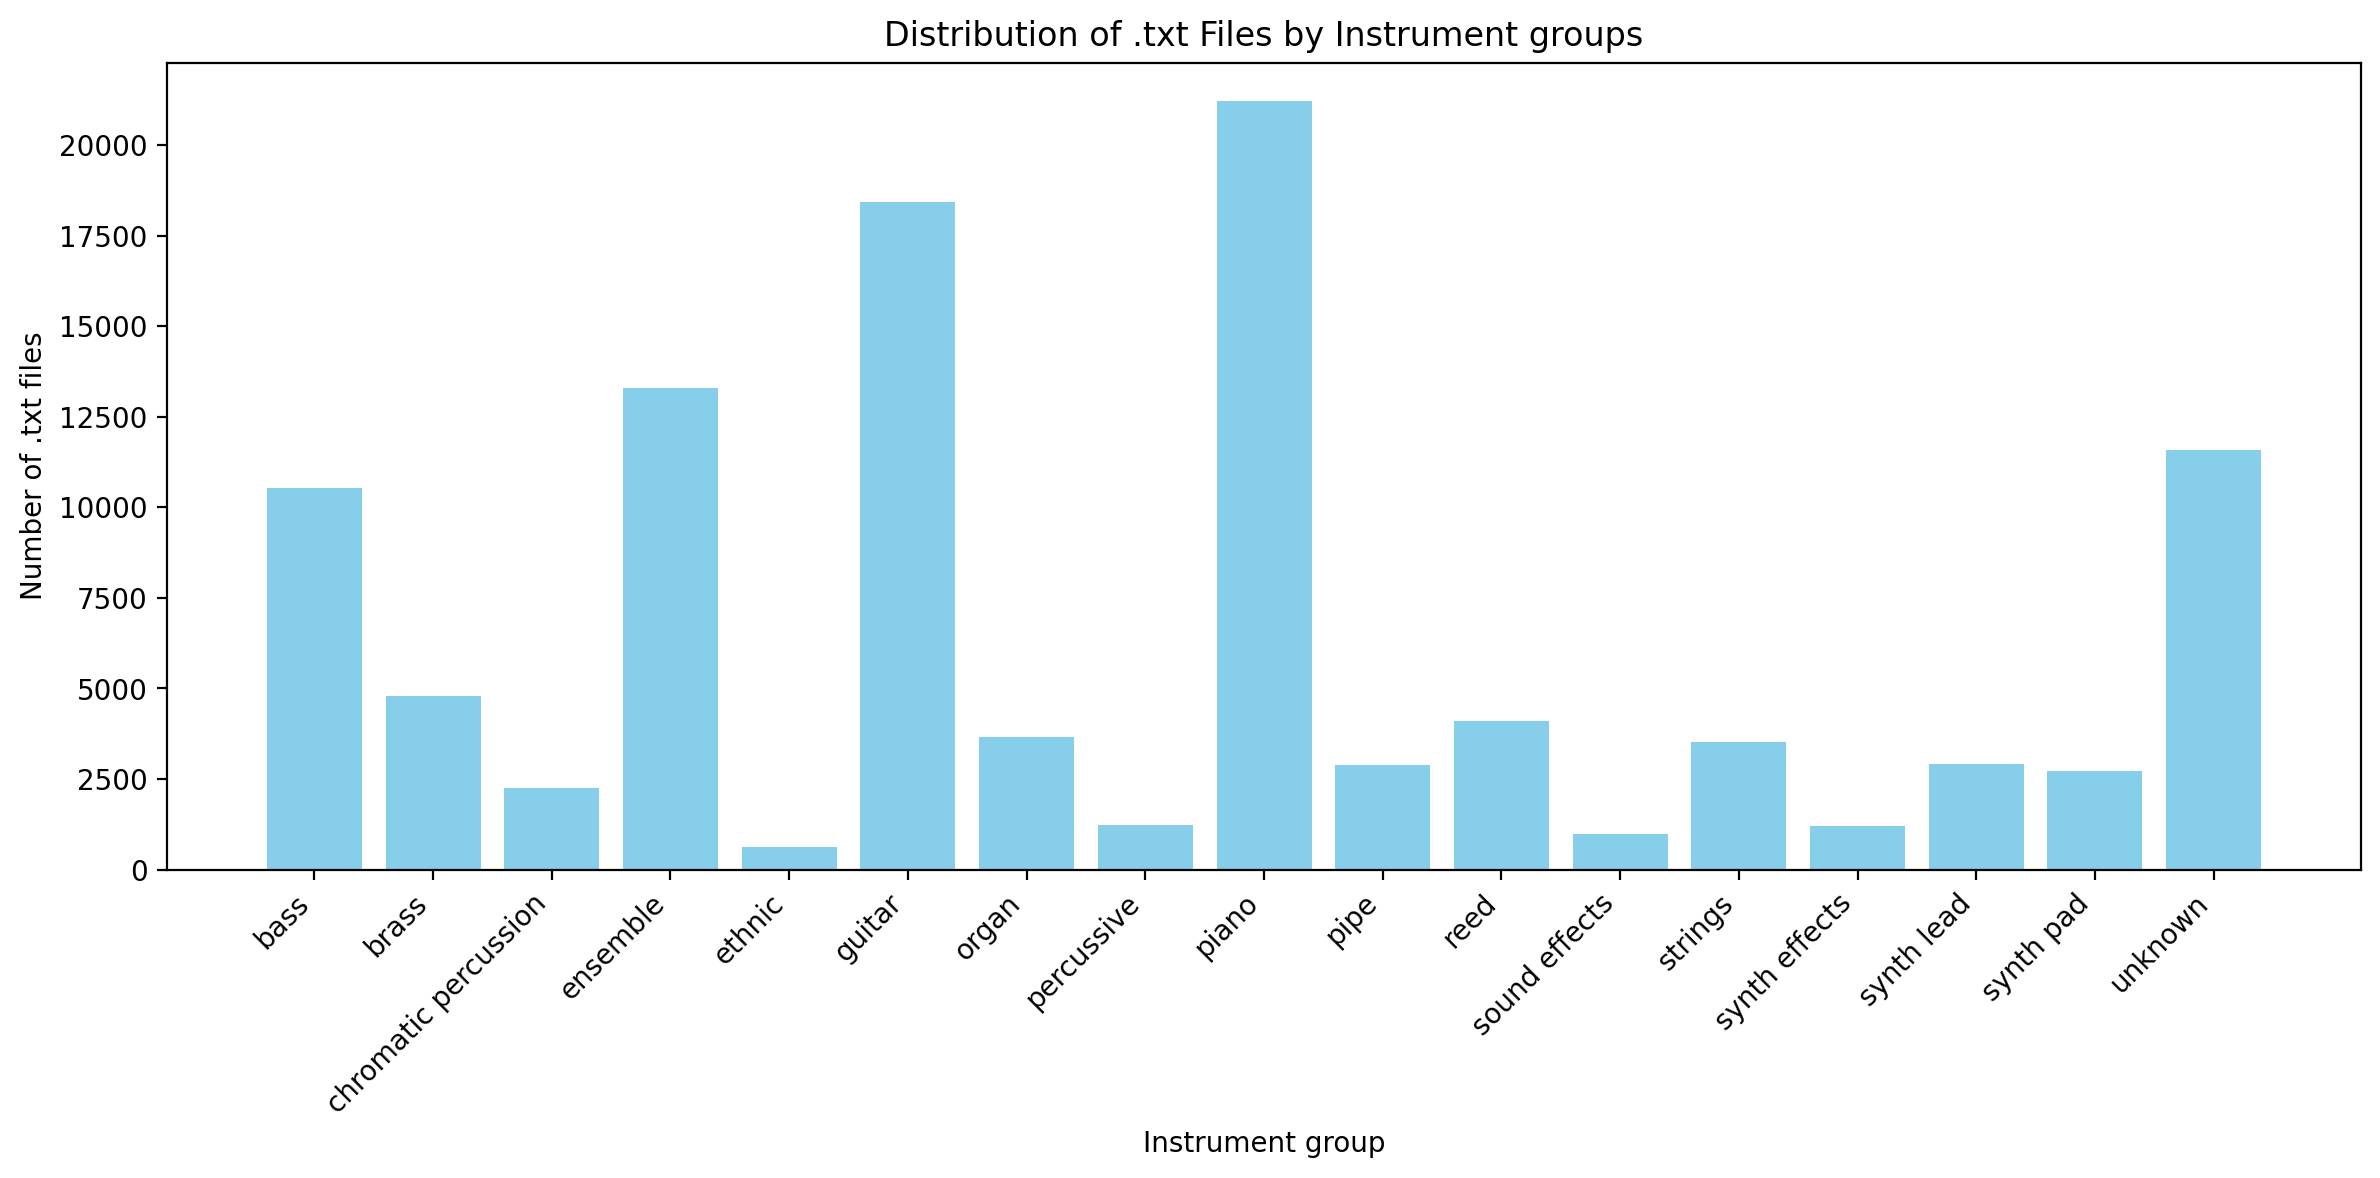

In [34]:
# Count and plot all instruments (sorted by instrument_id)
instrument_counts = count_instruments_by_txt_files(READY_MIDI_PATH)
plot_instrument_distribution(instrument_counts)

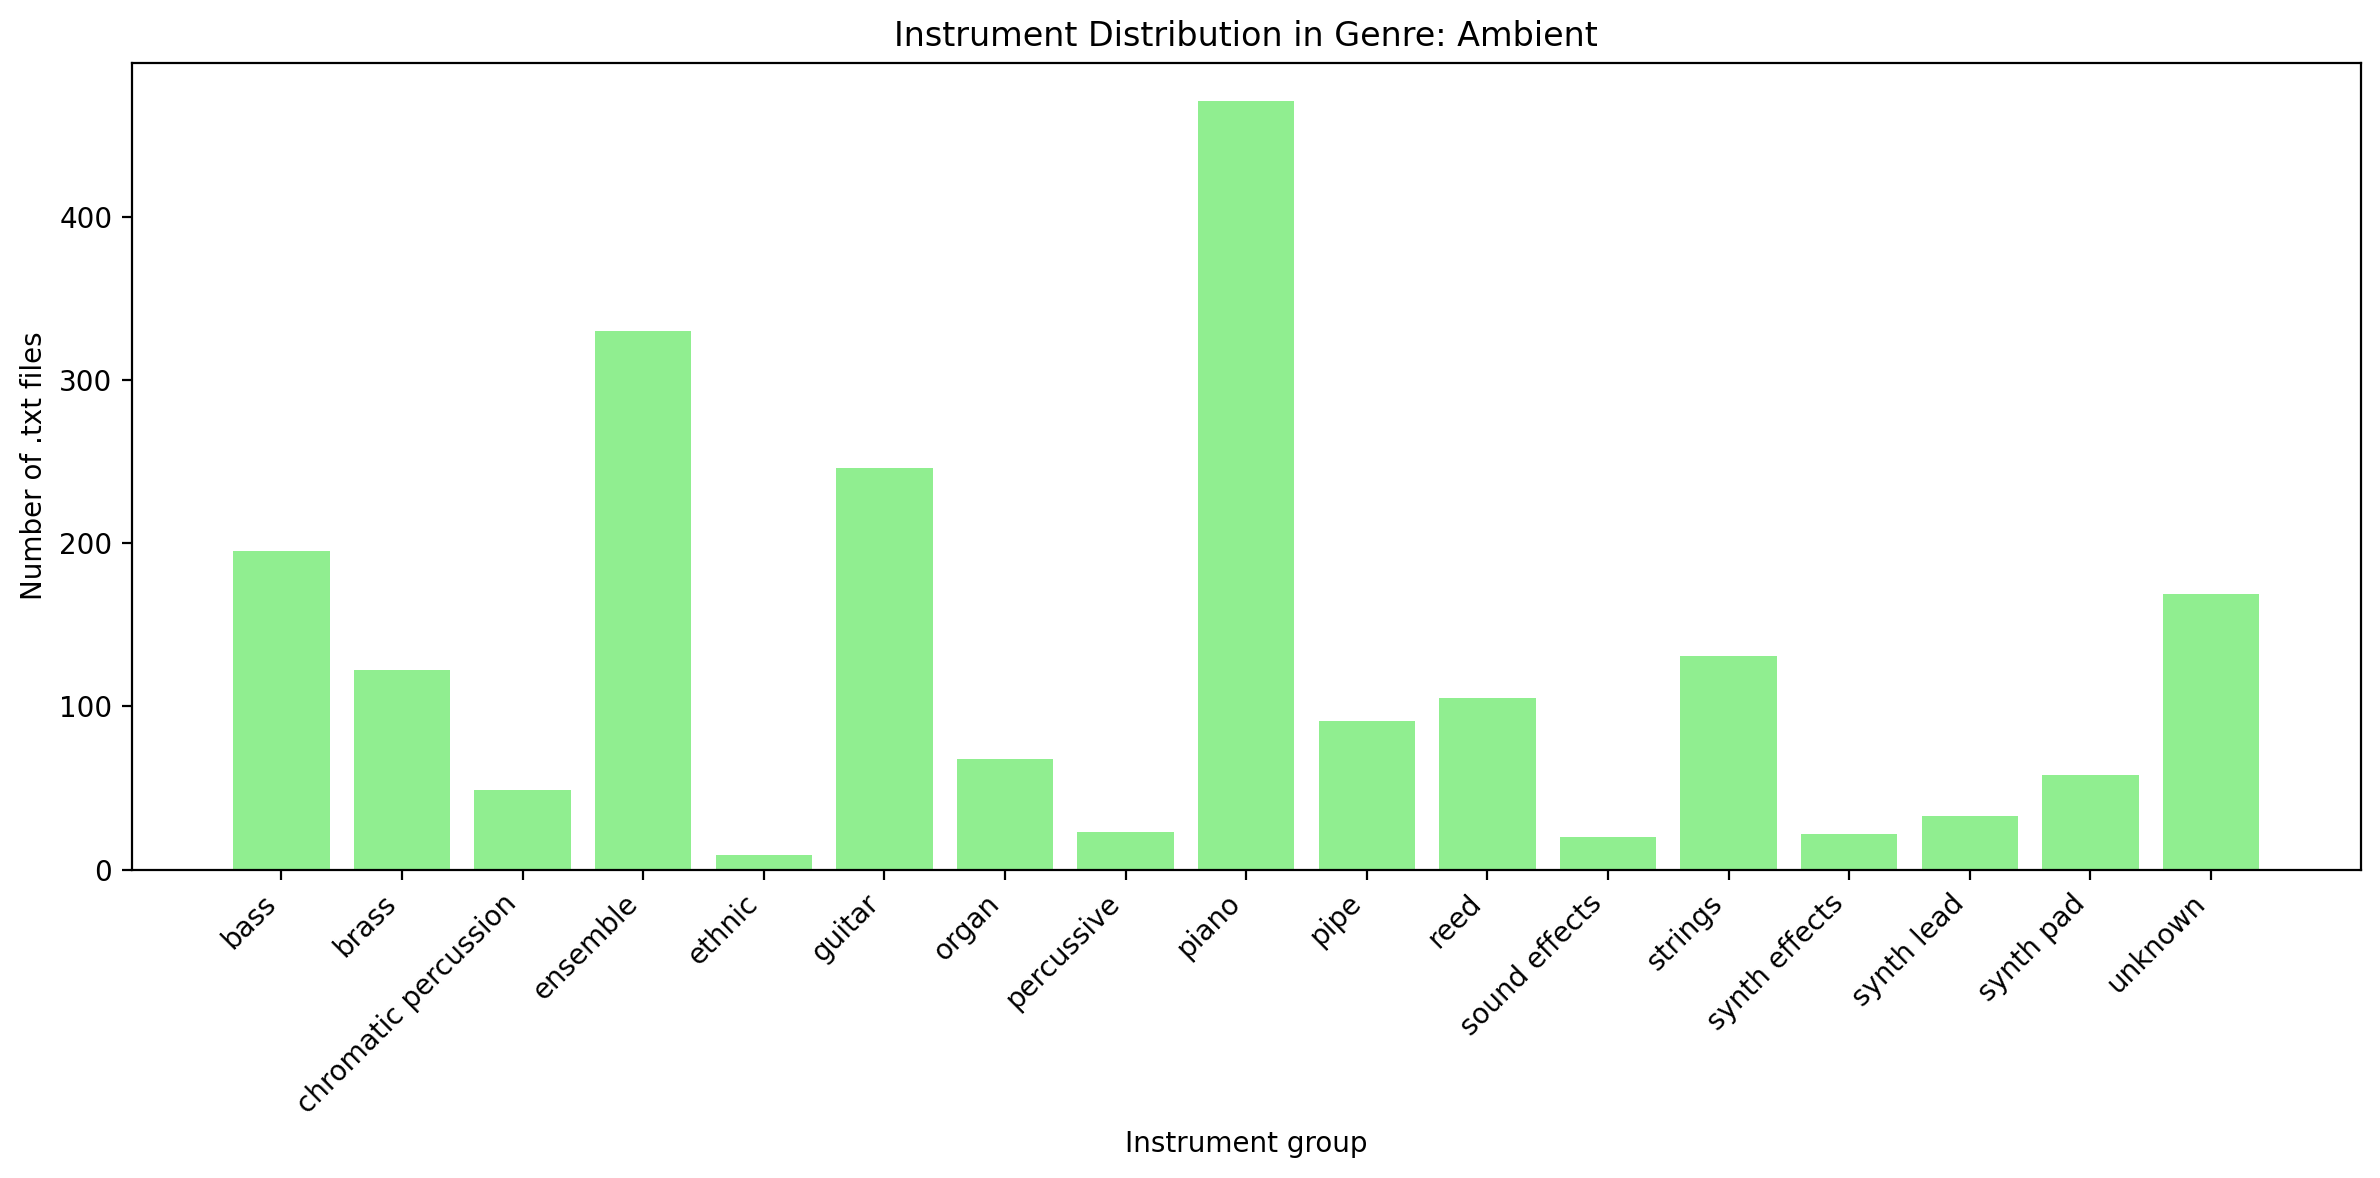

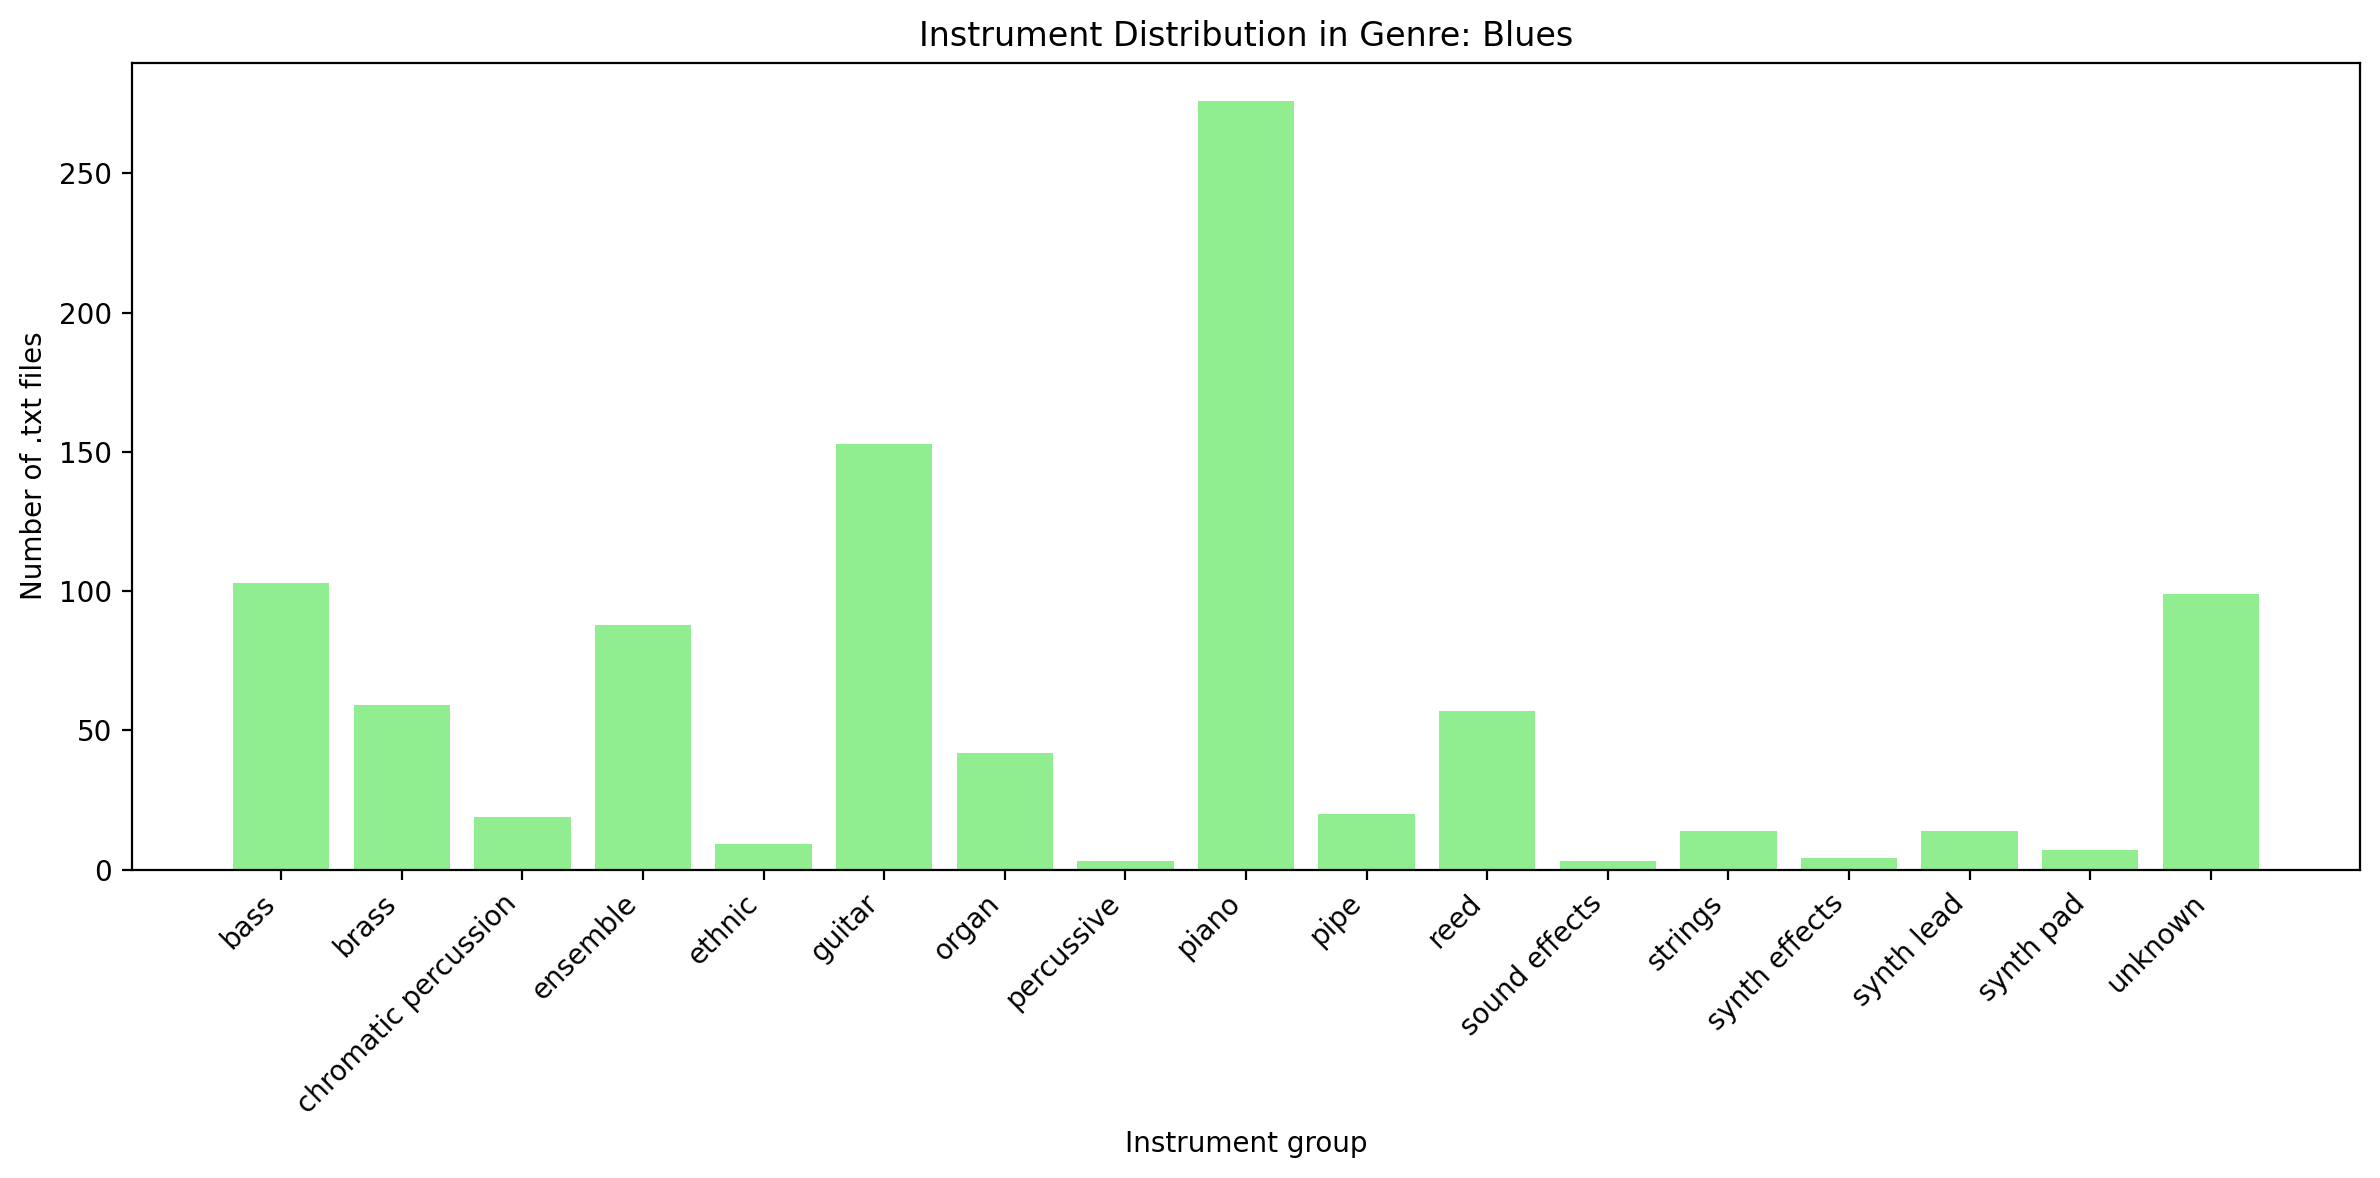

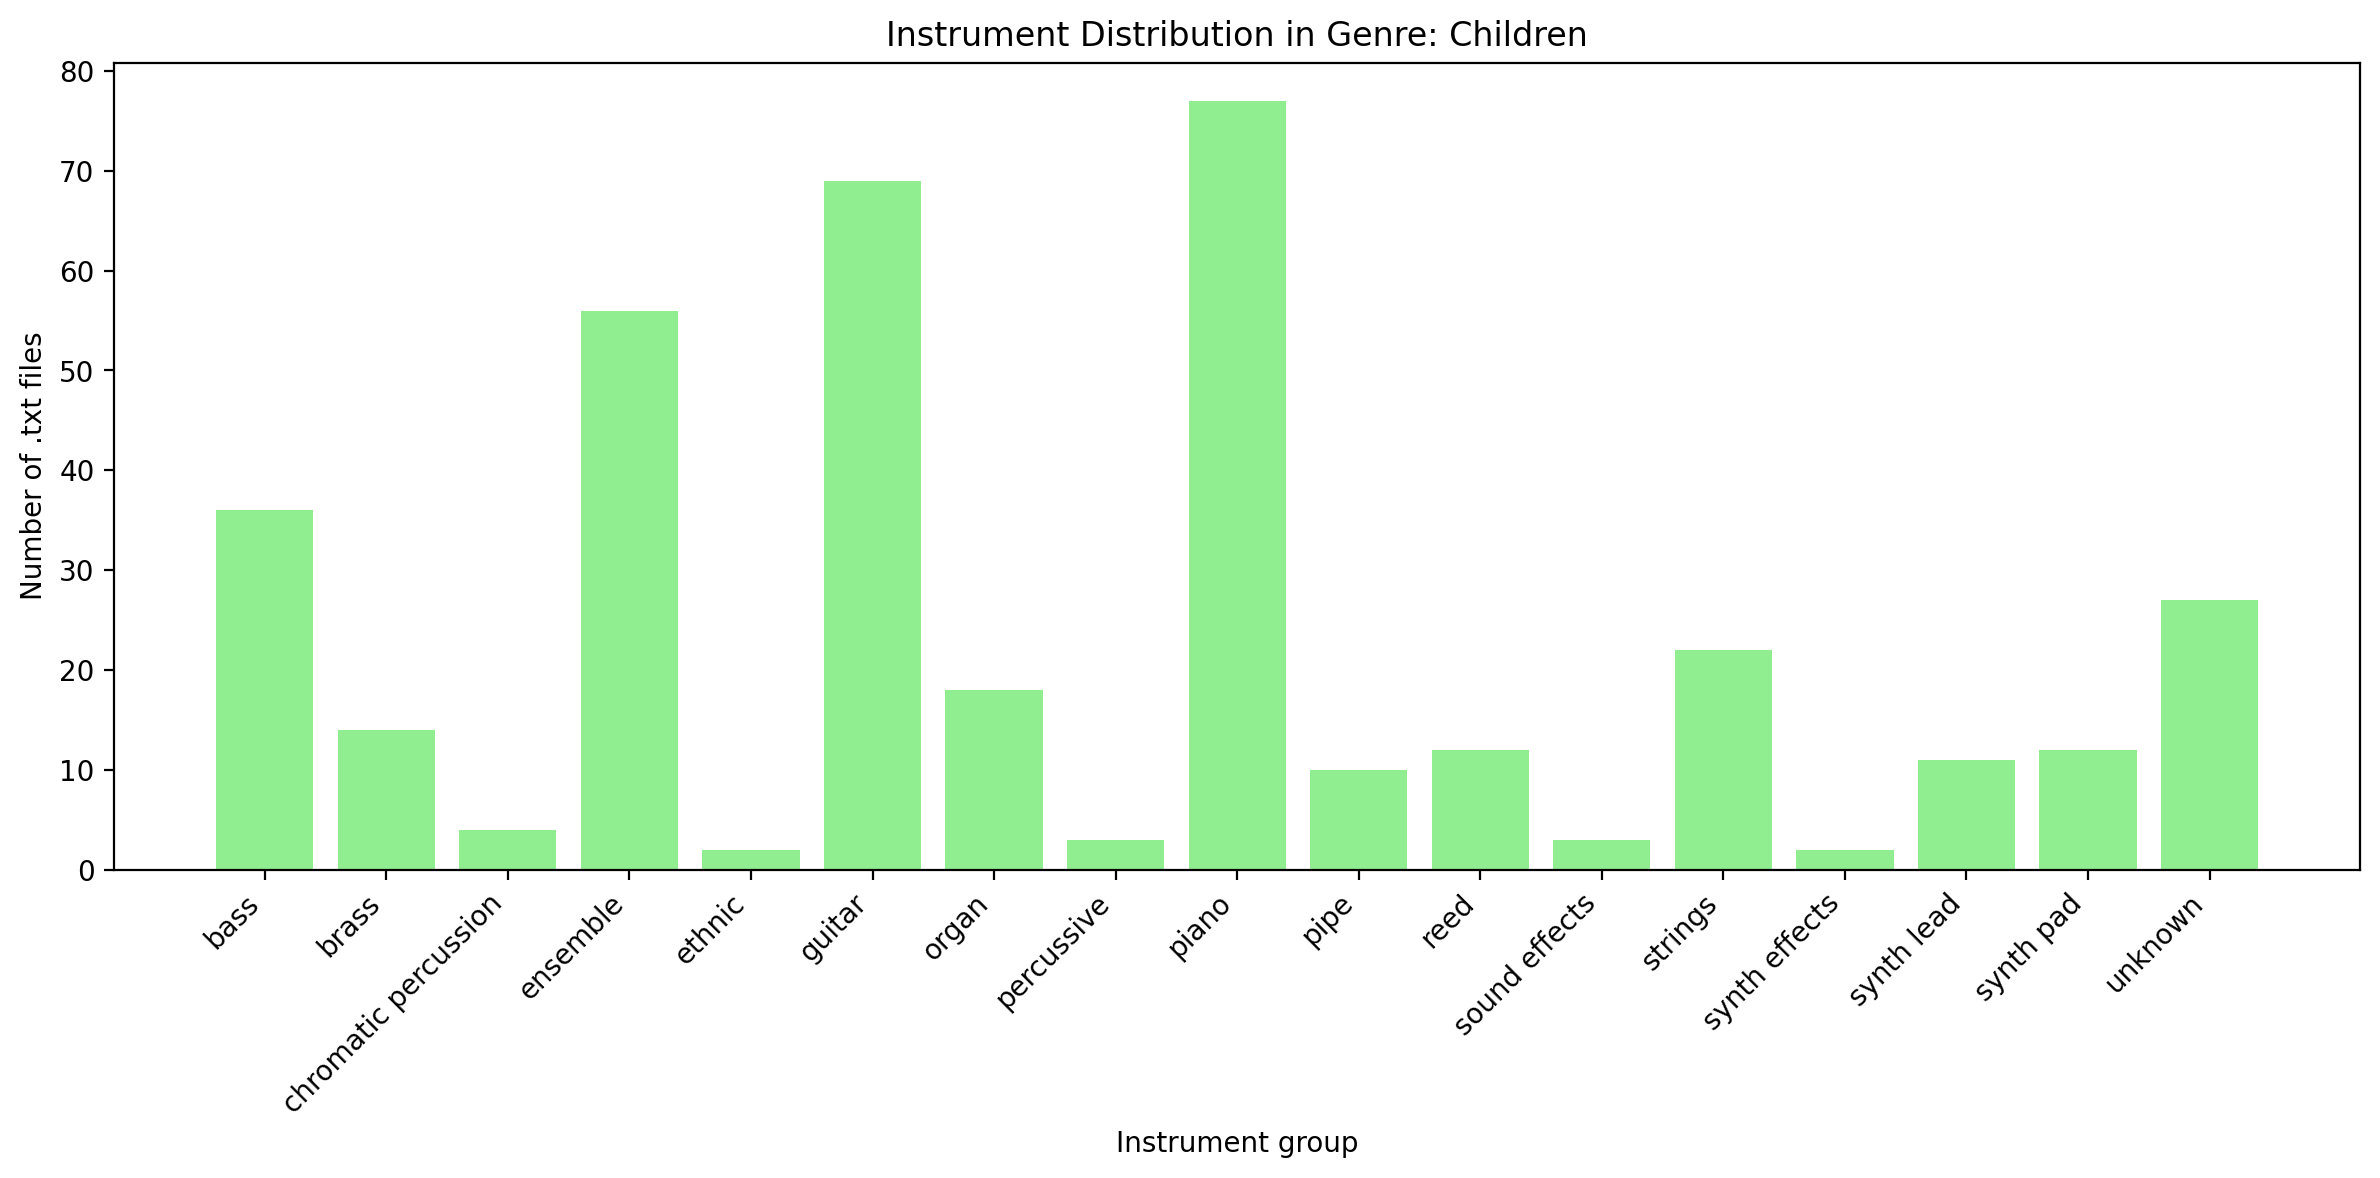

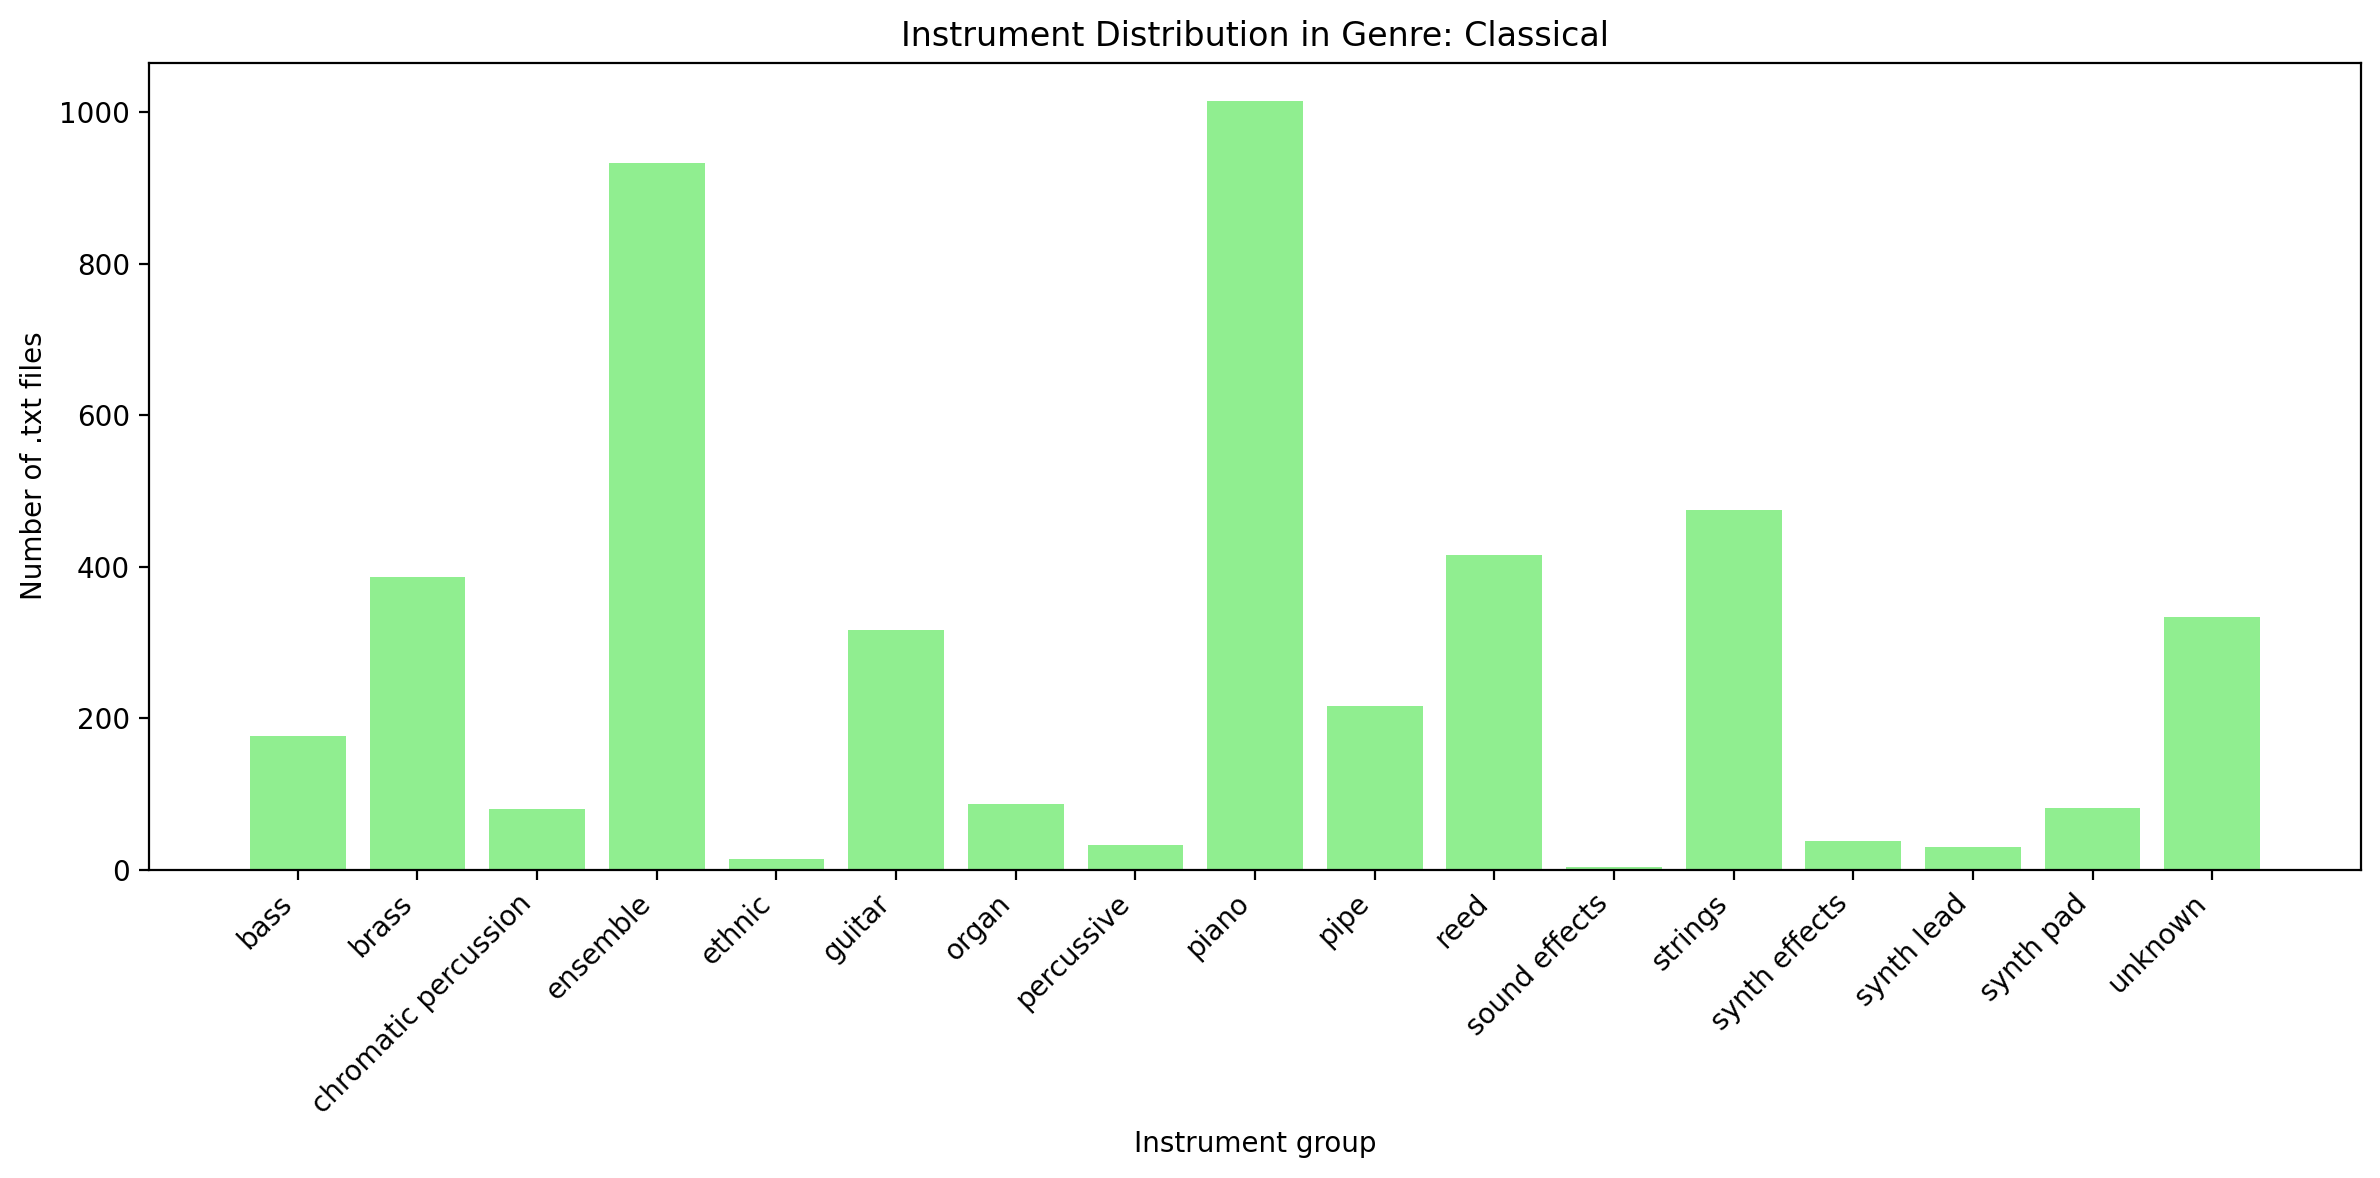

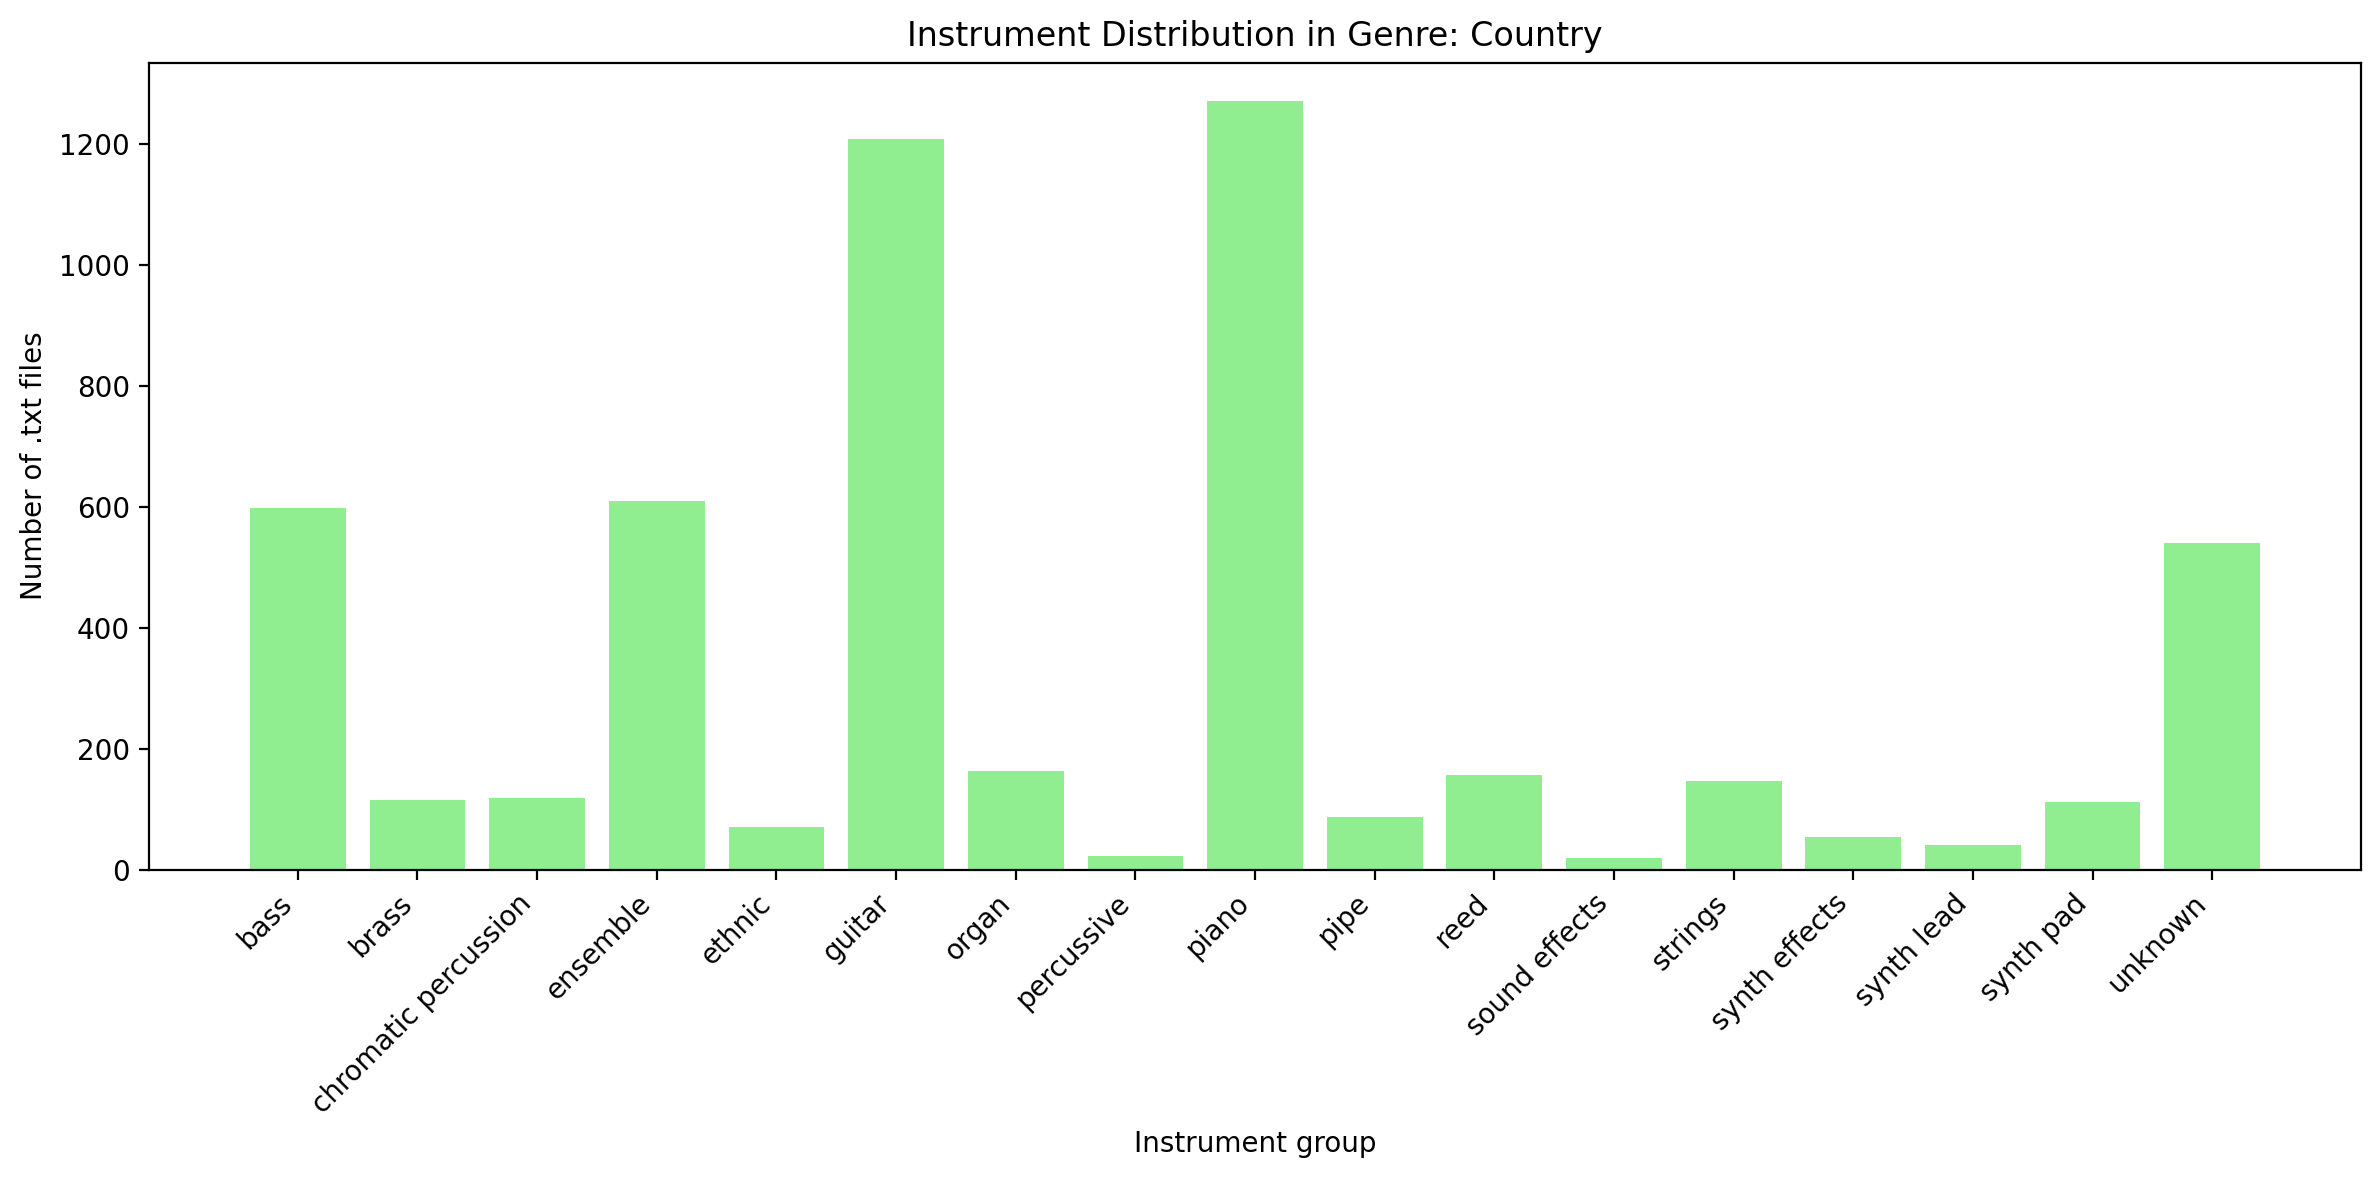

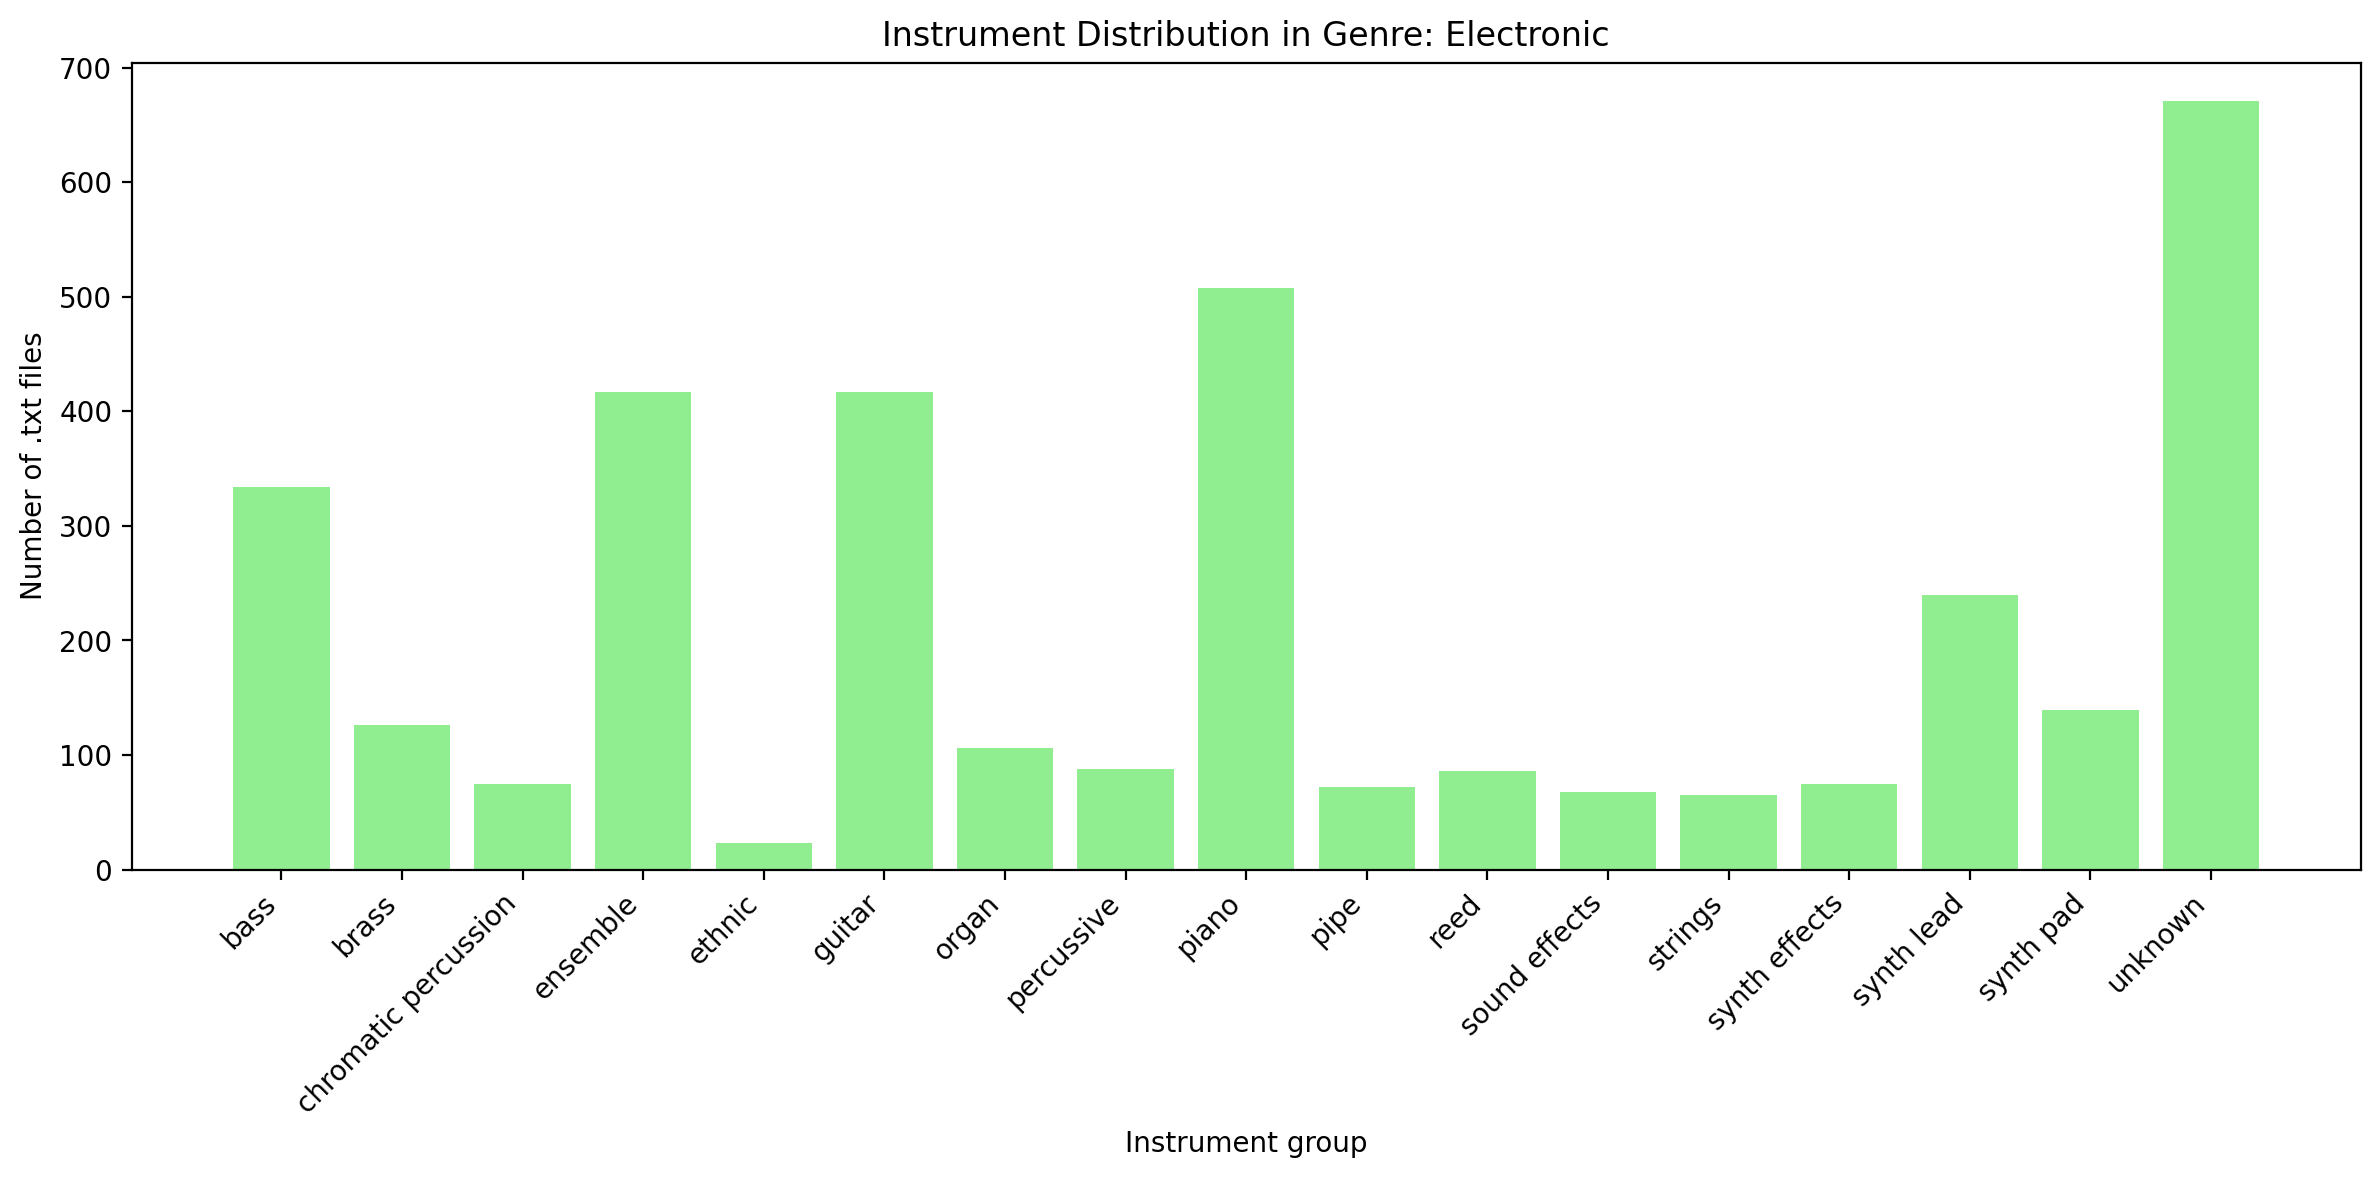

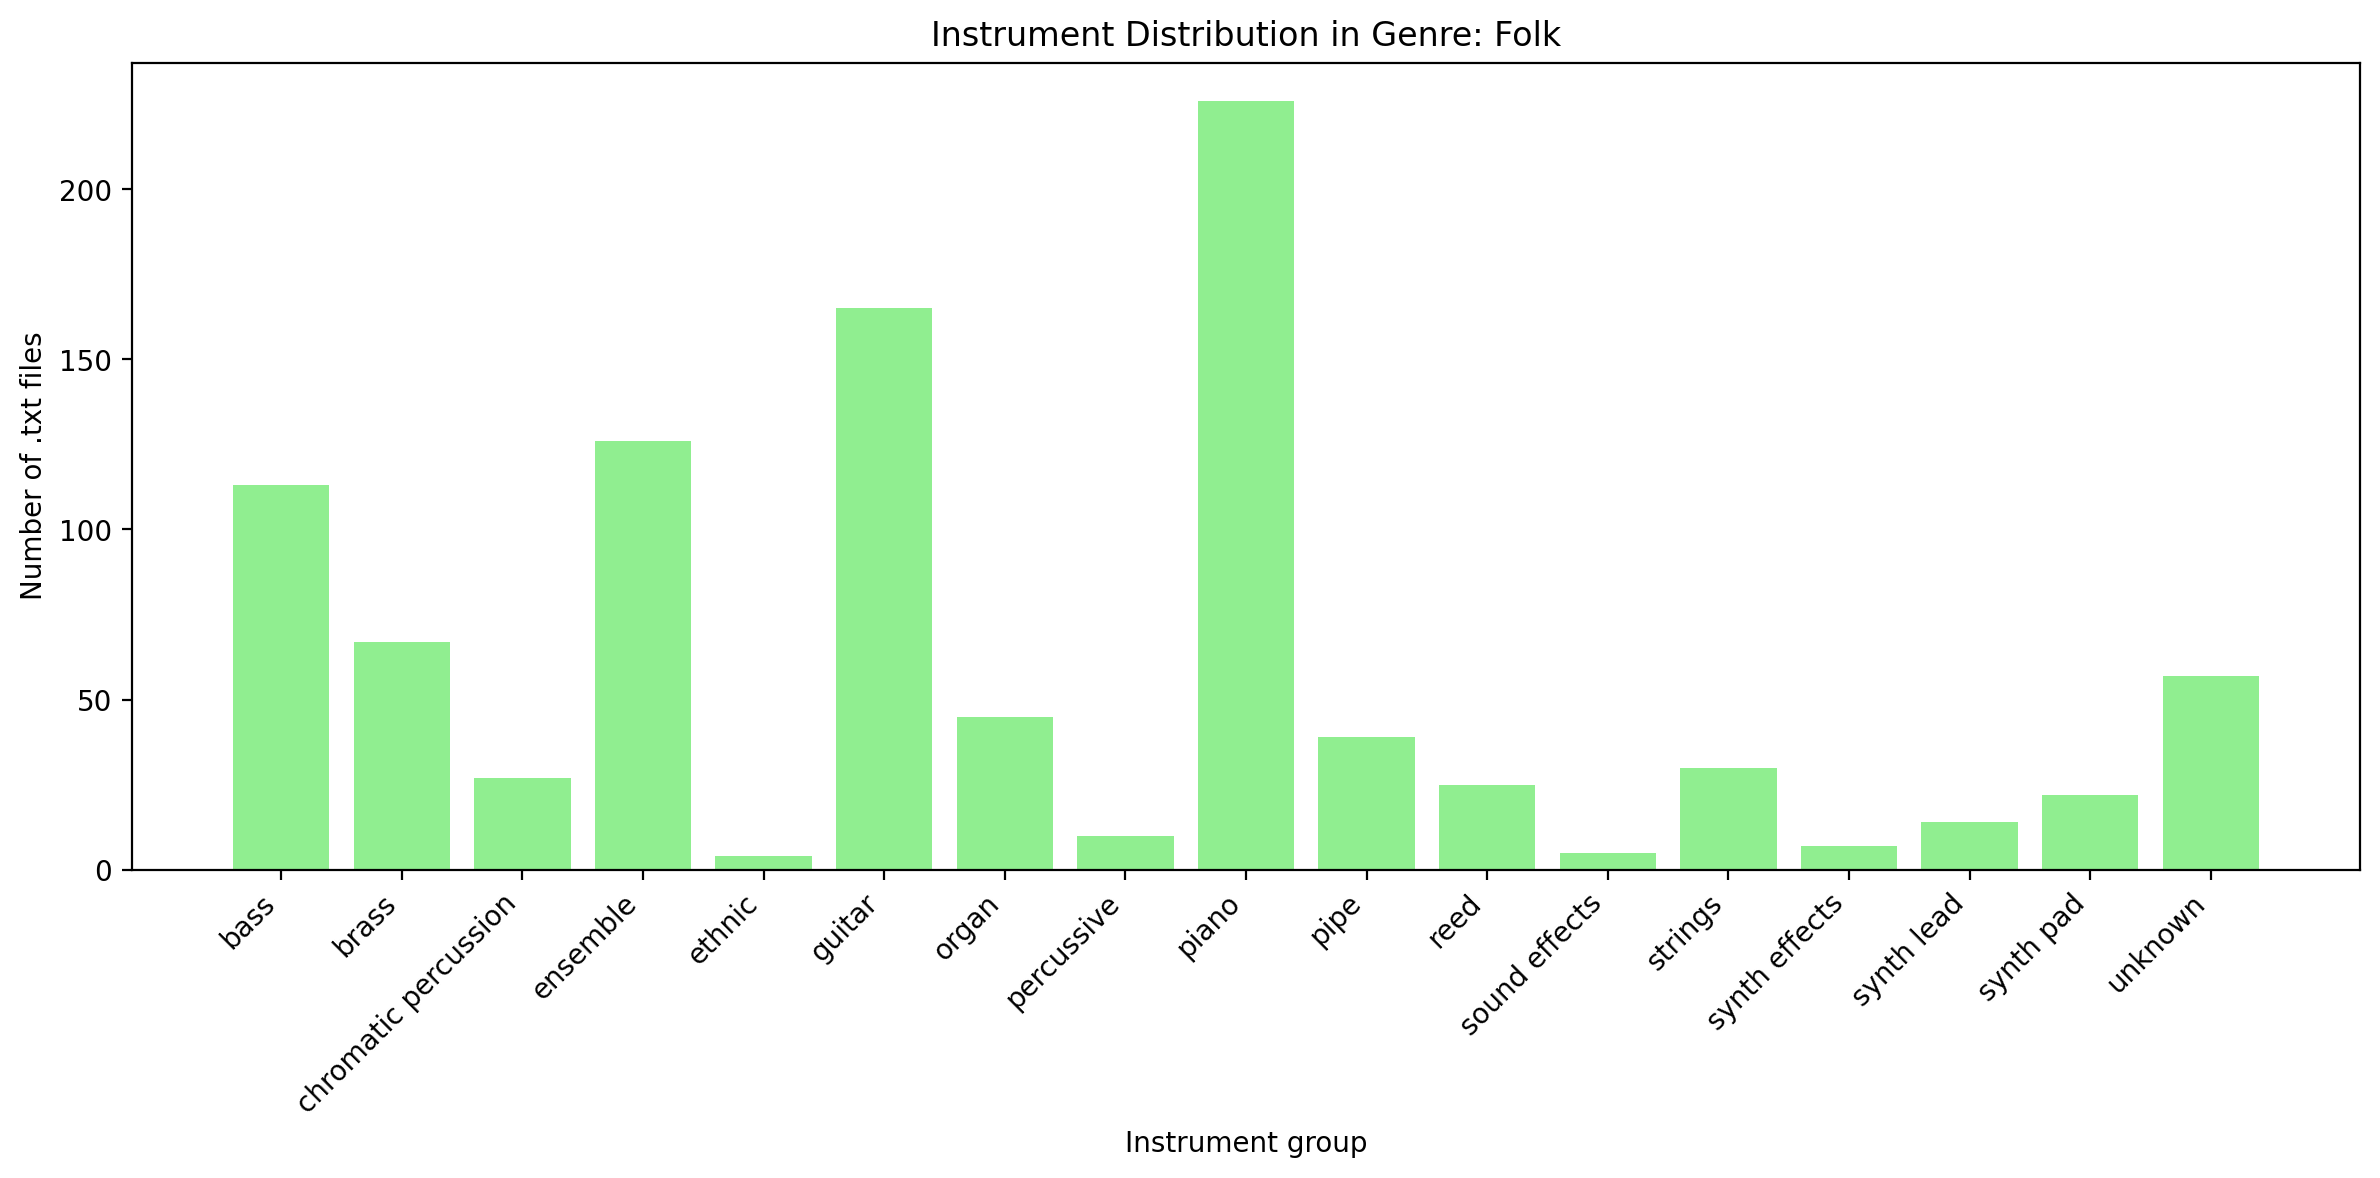

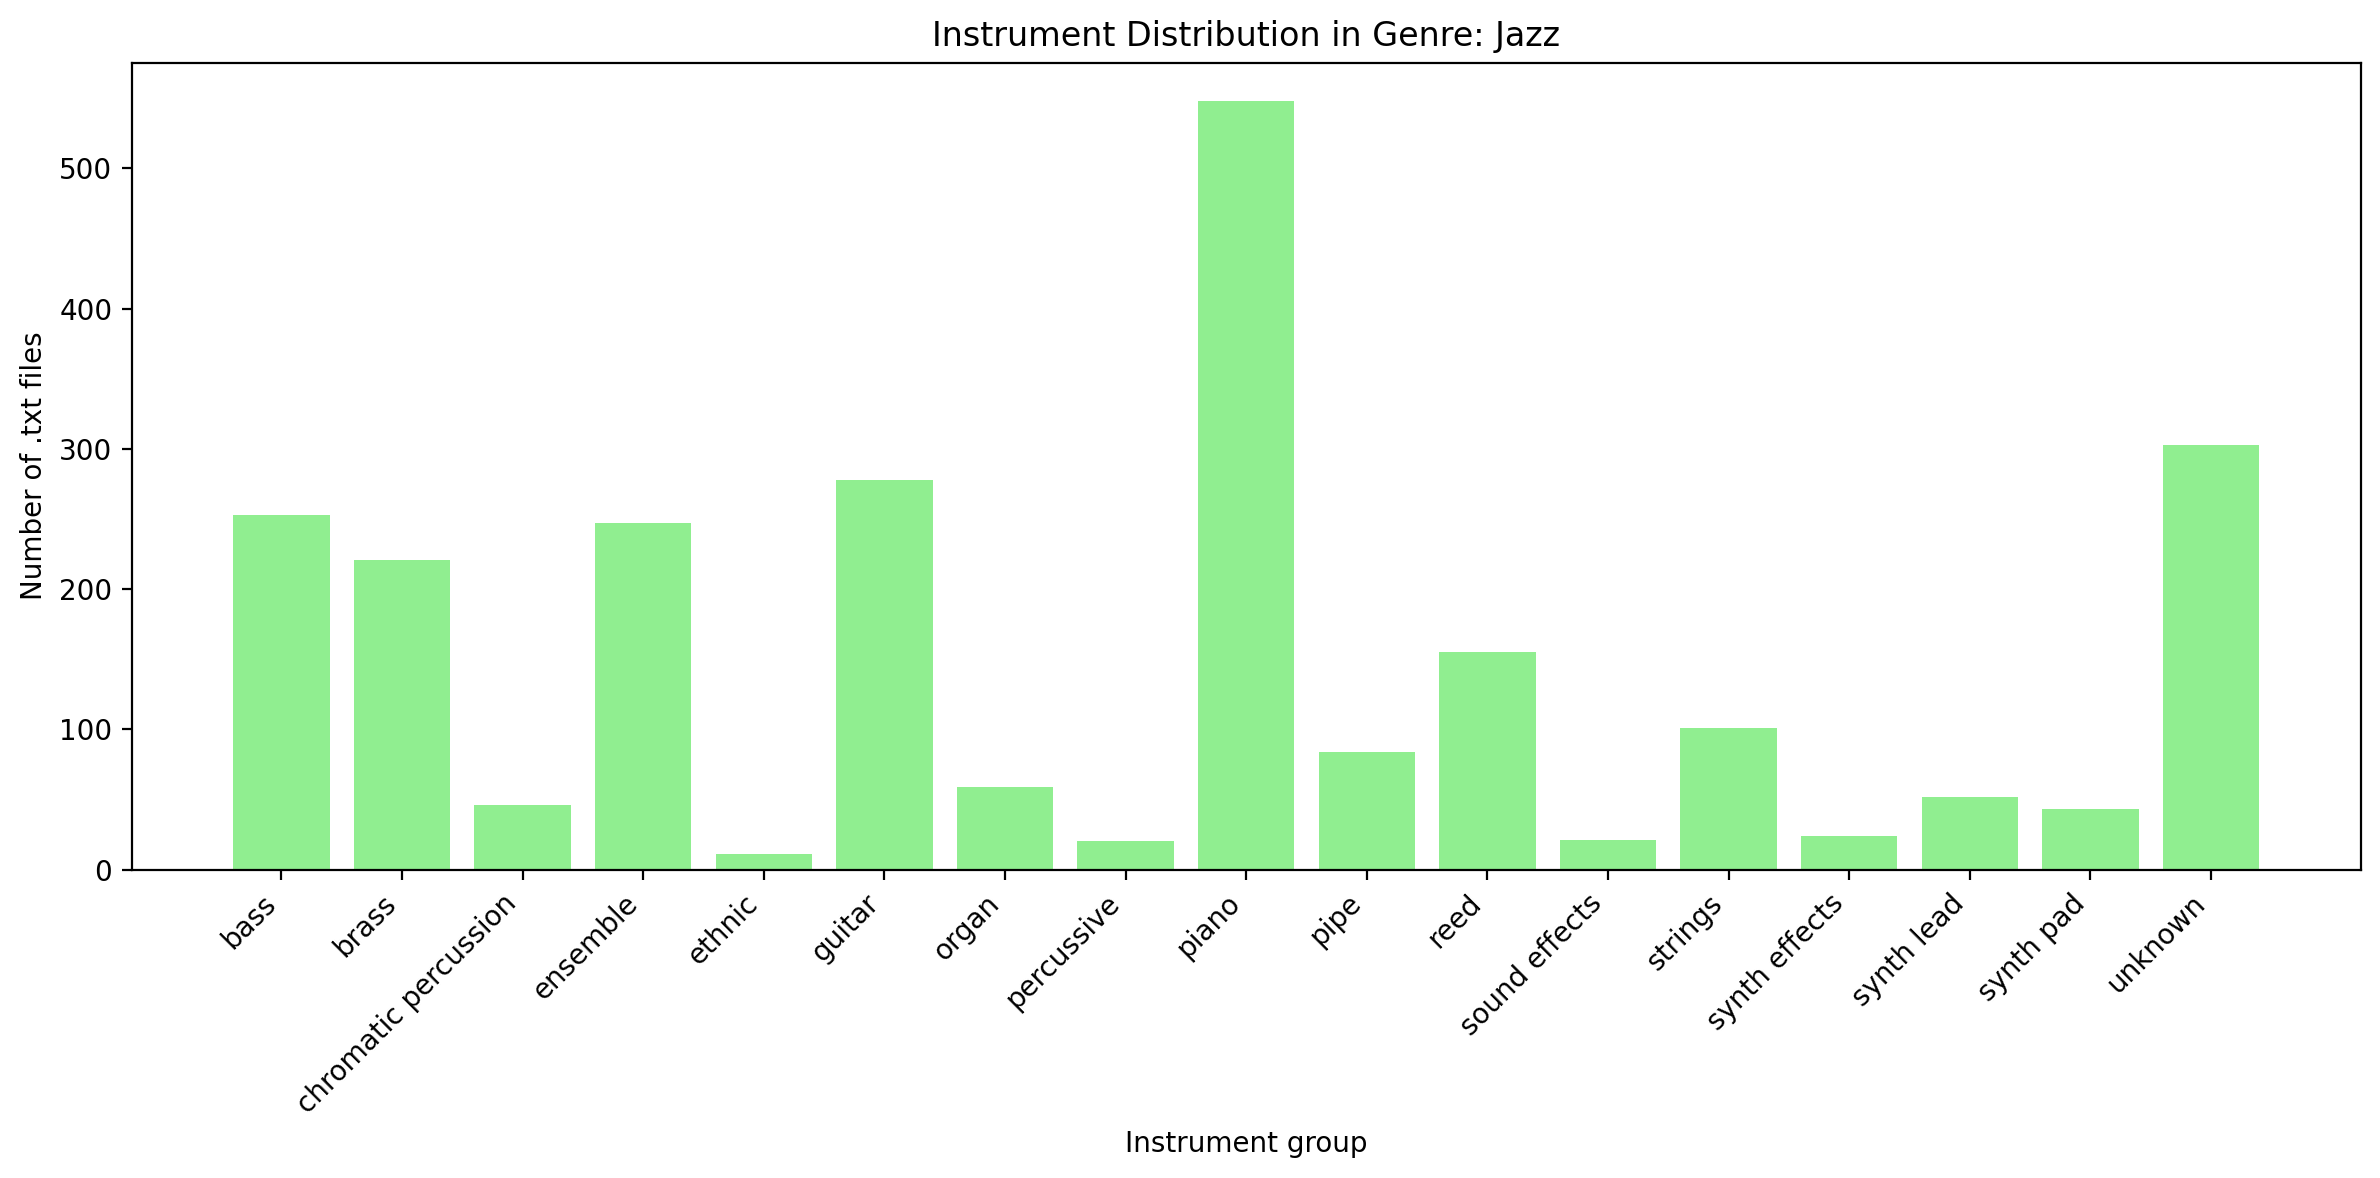

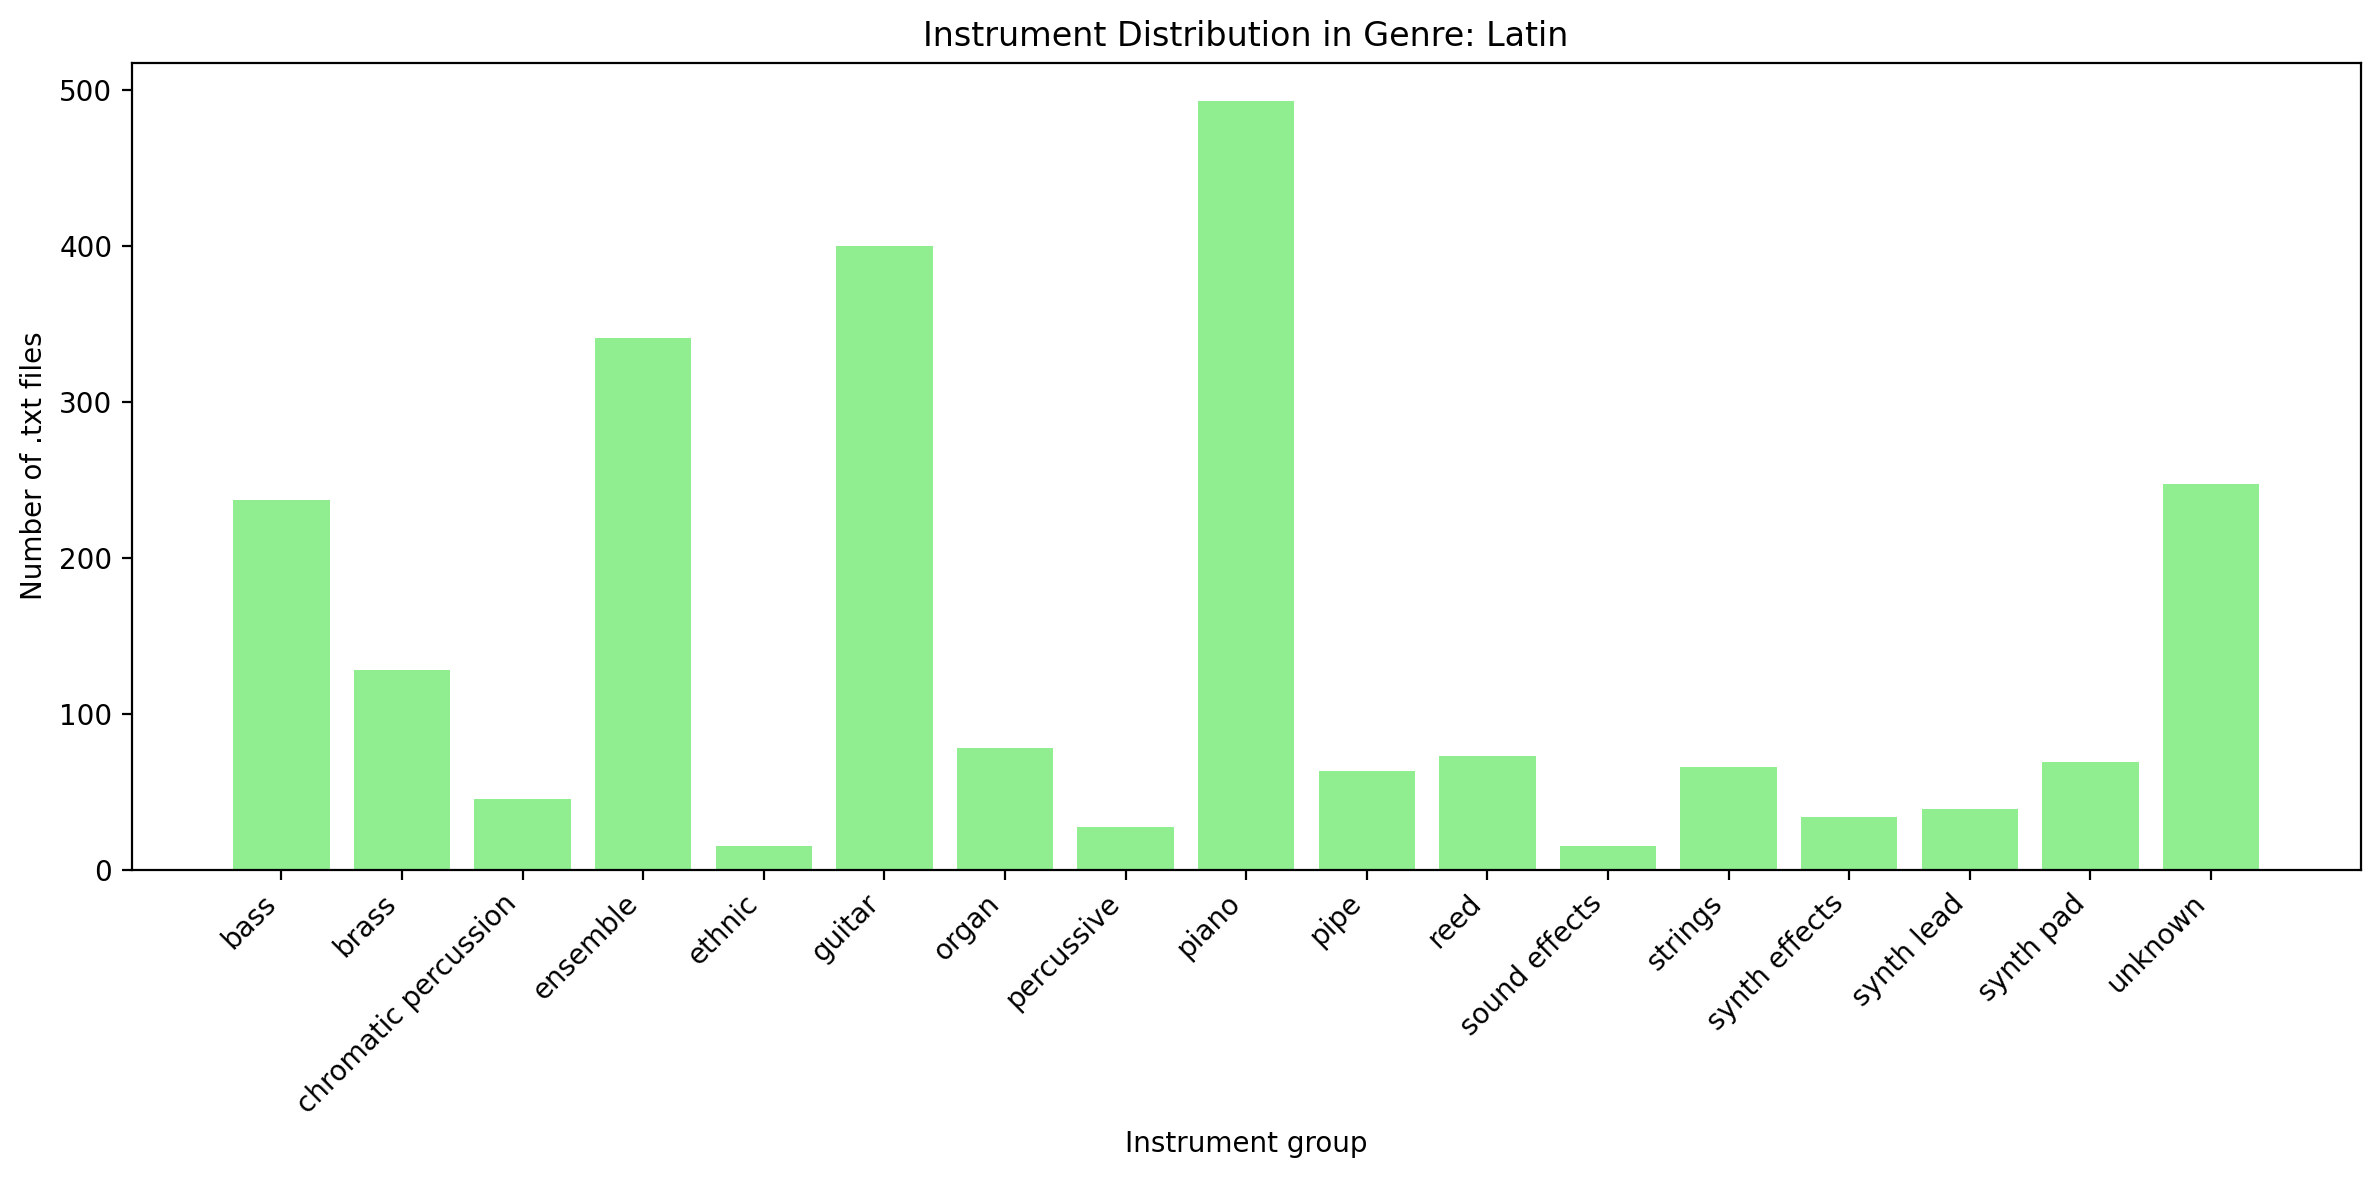

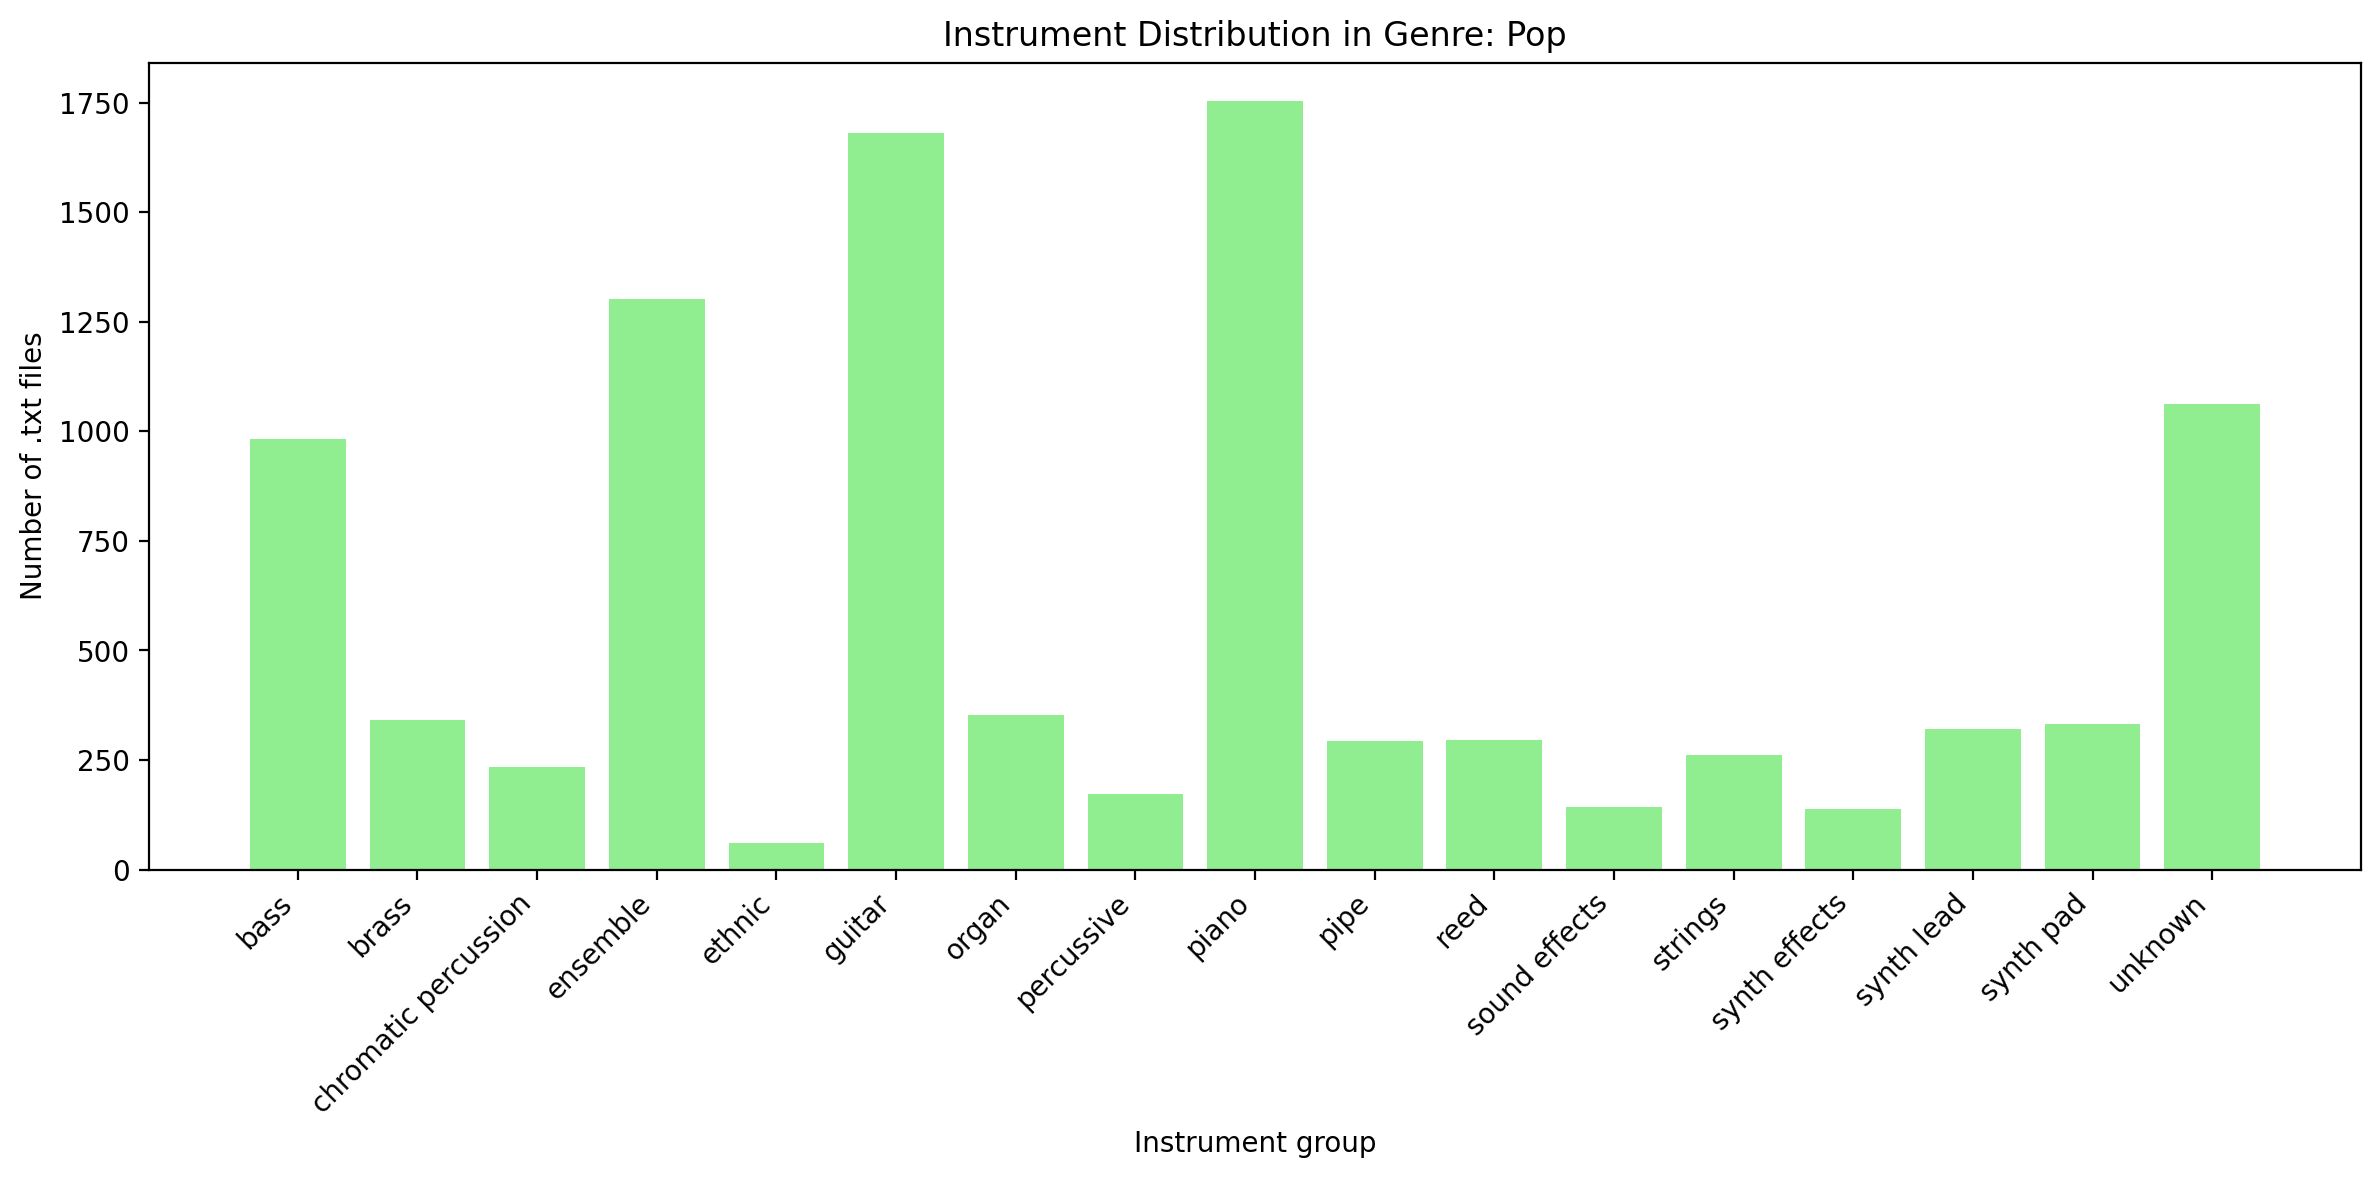

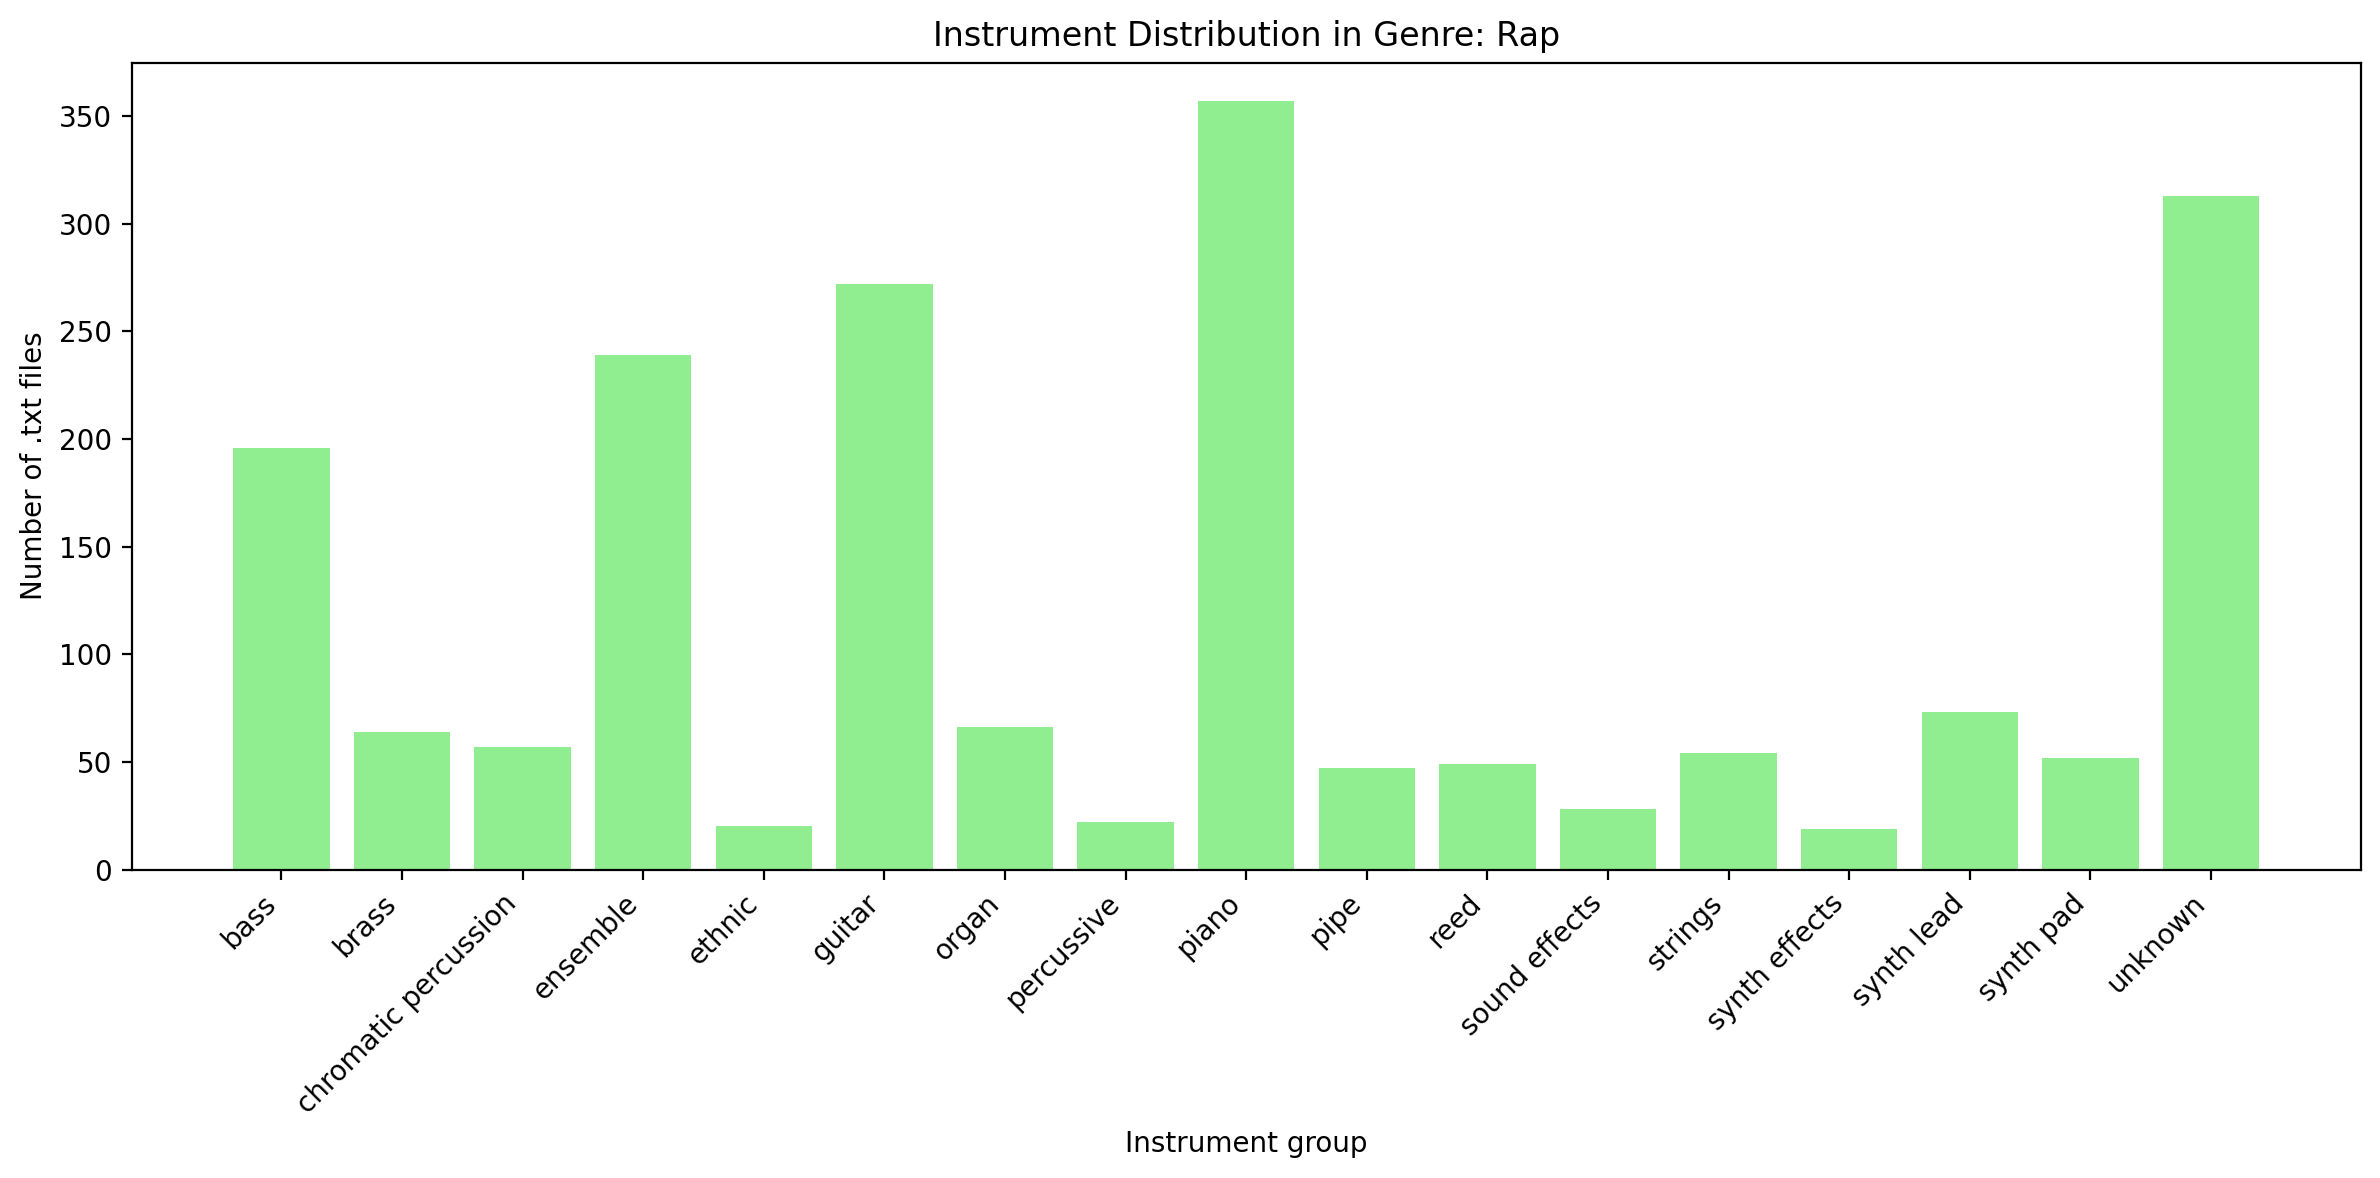

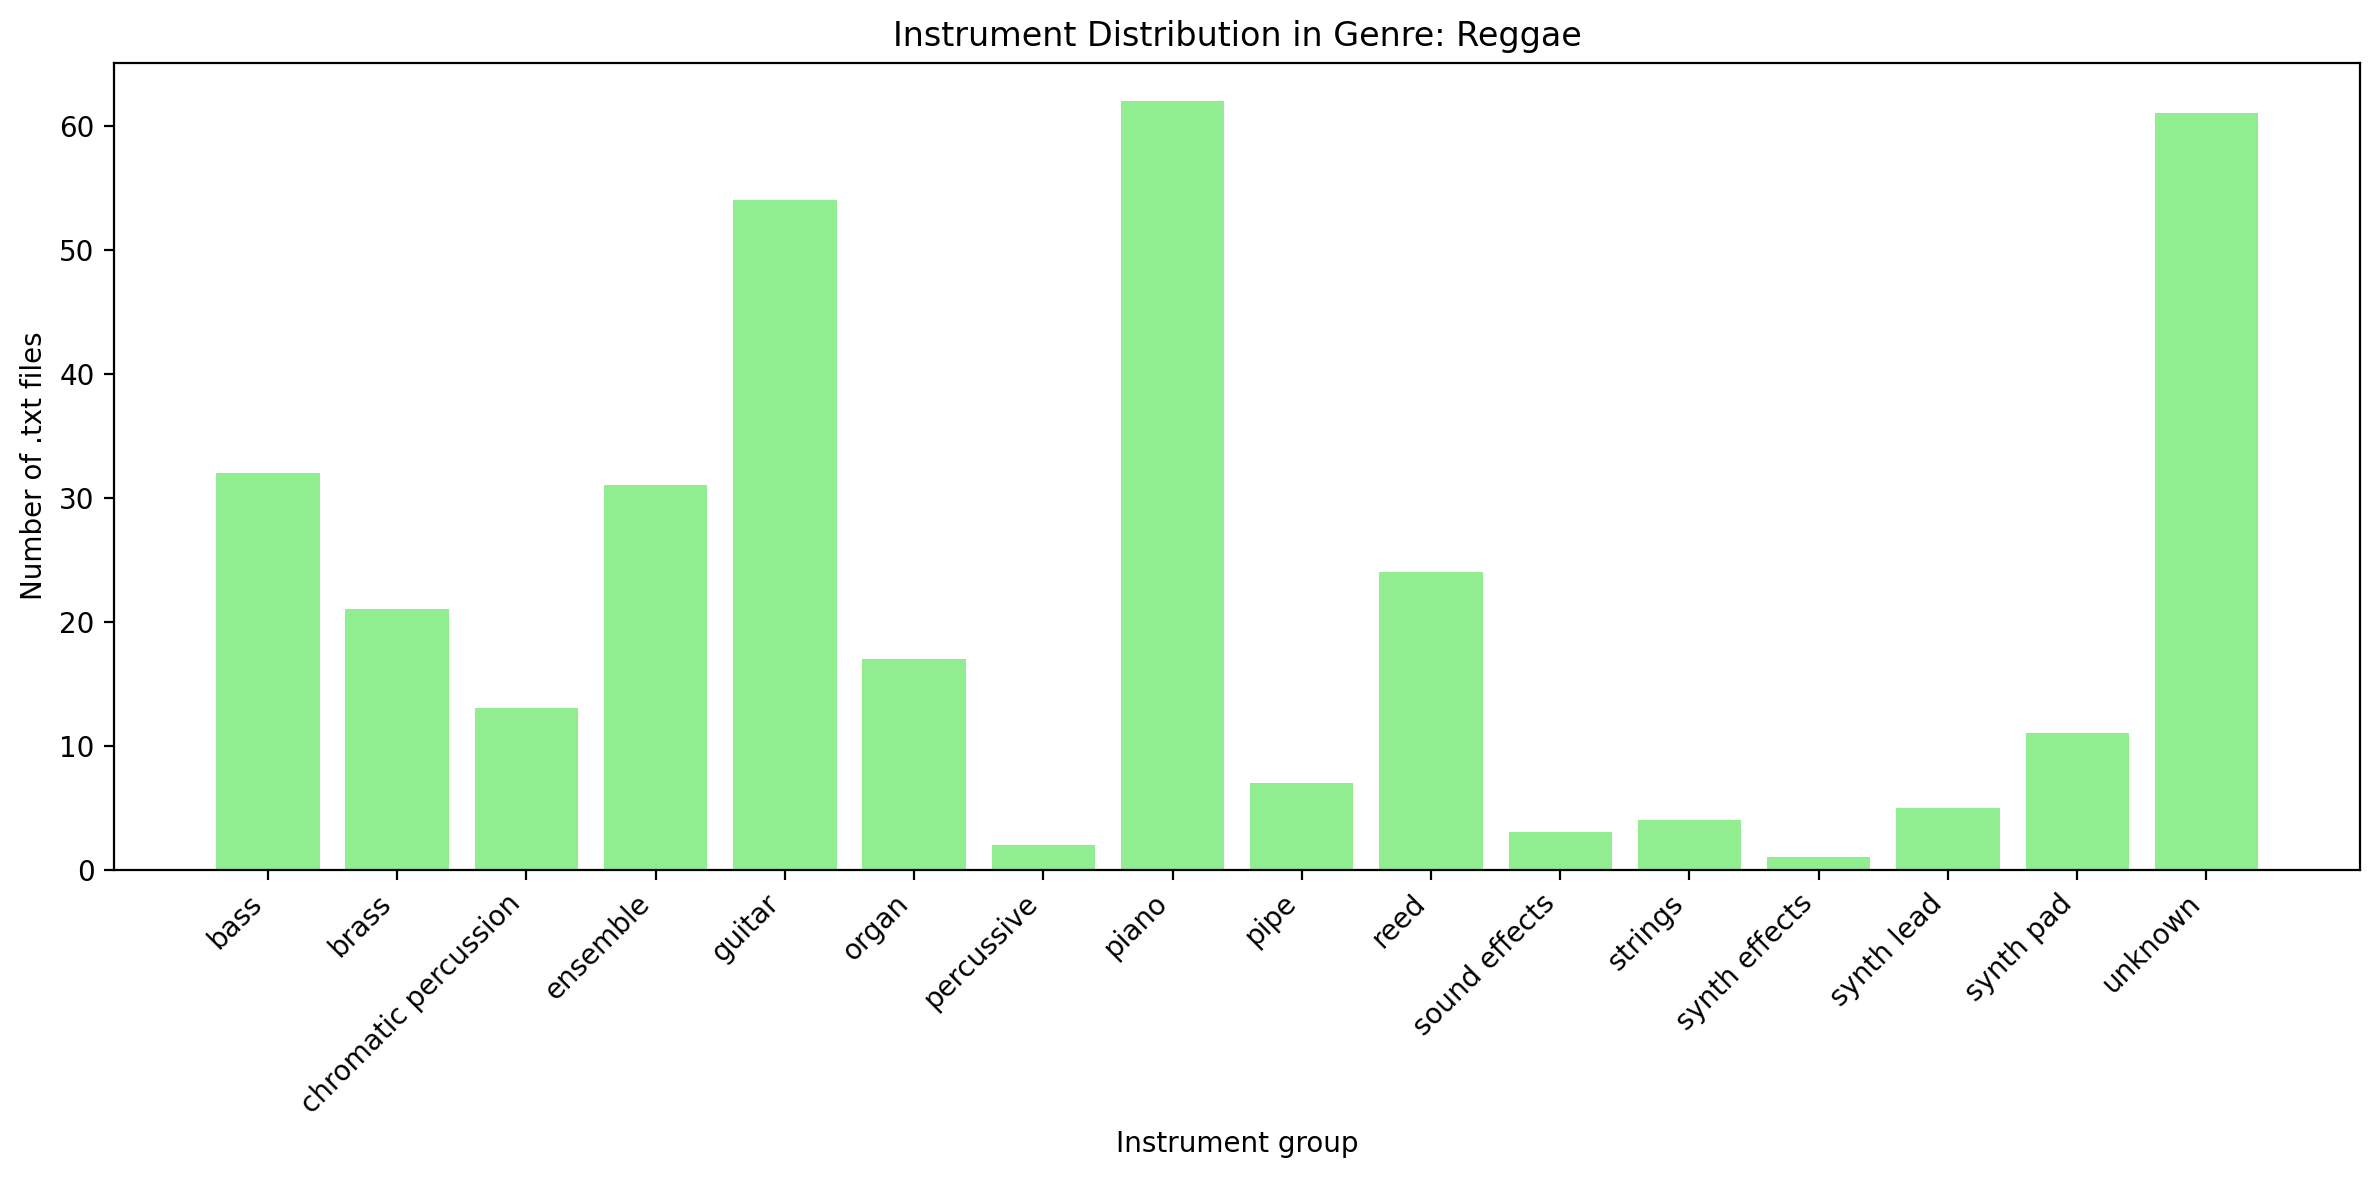

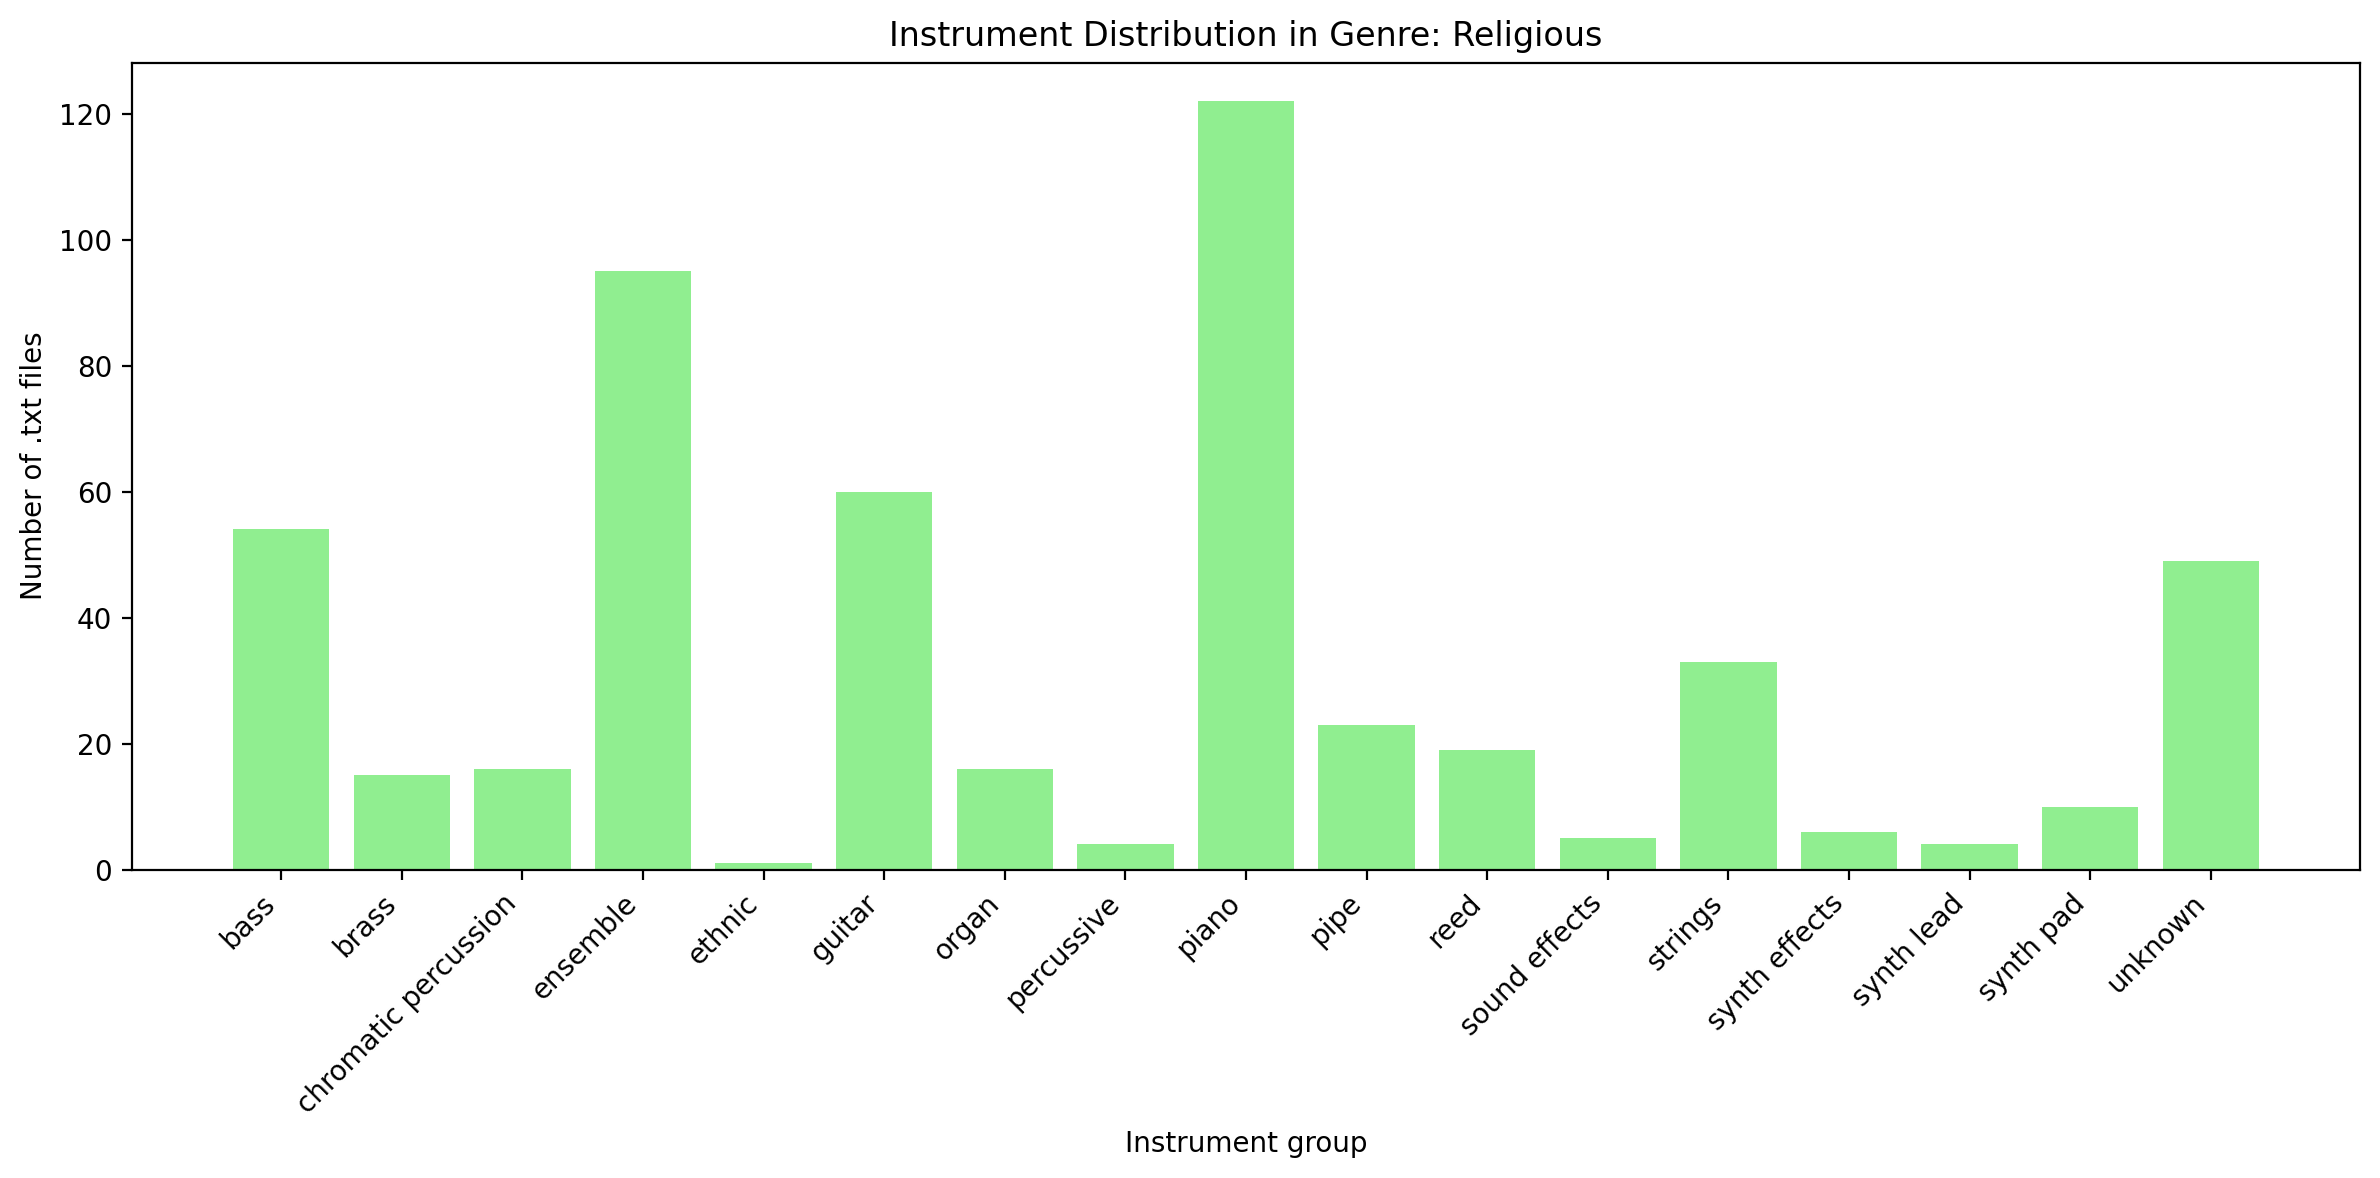

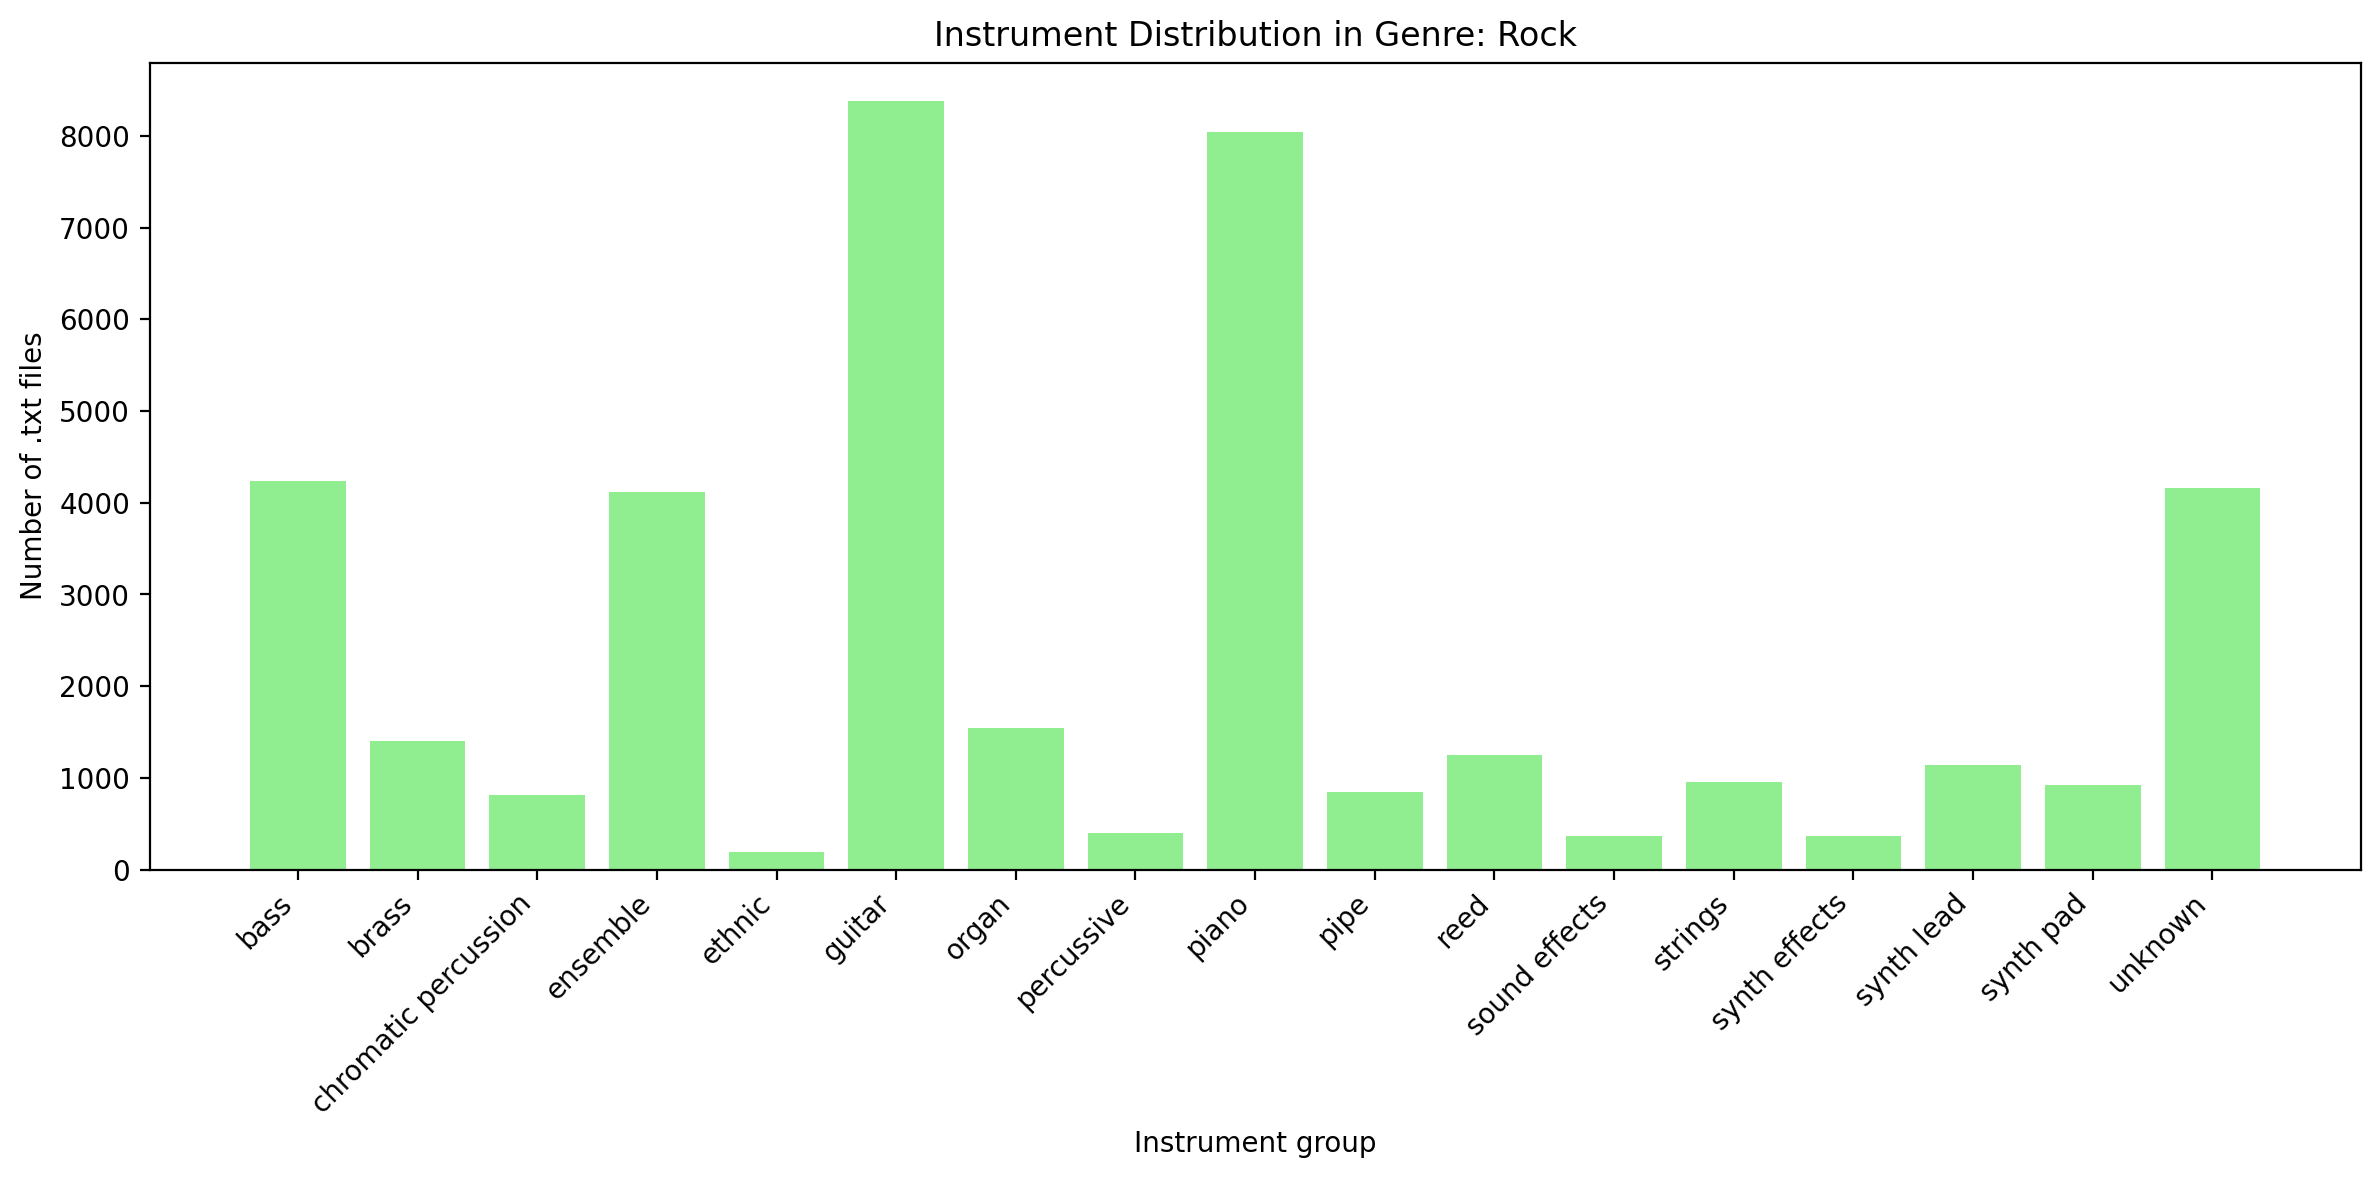

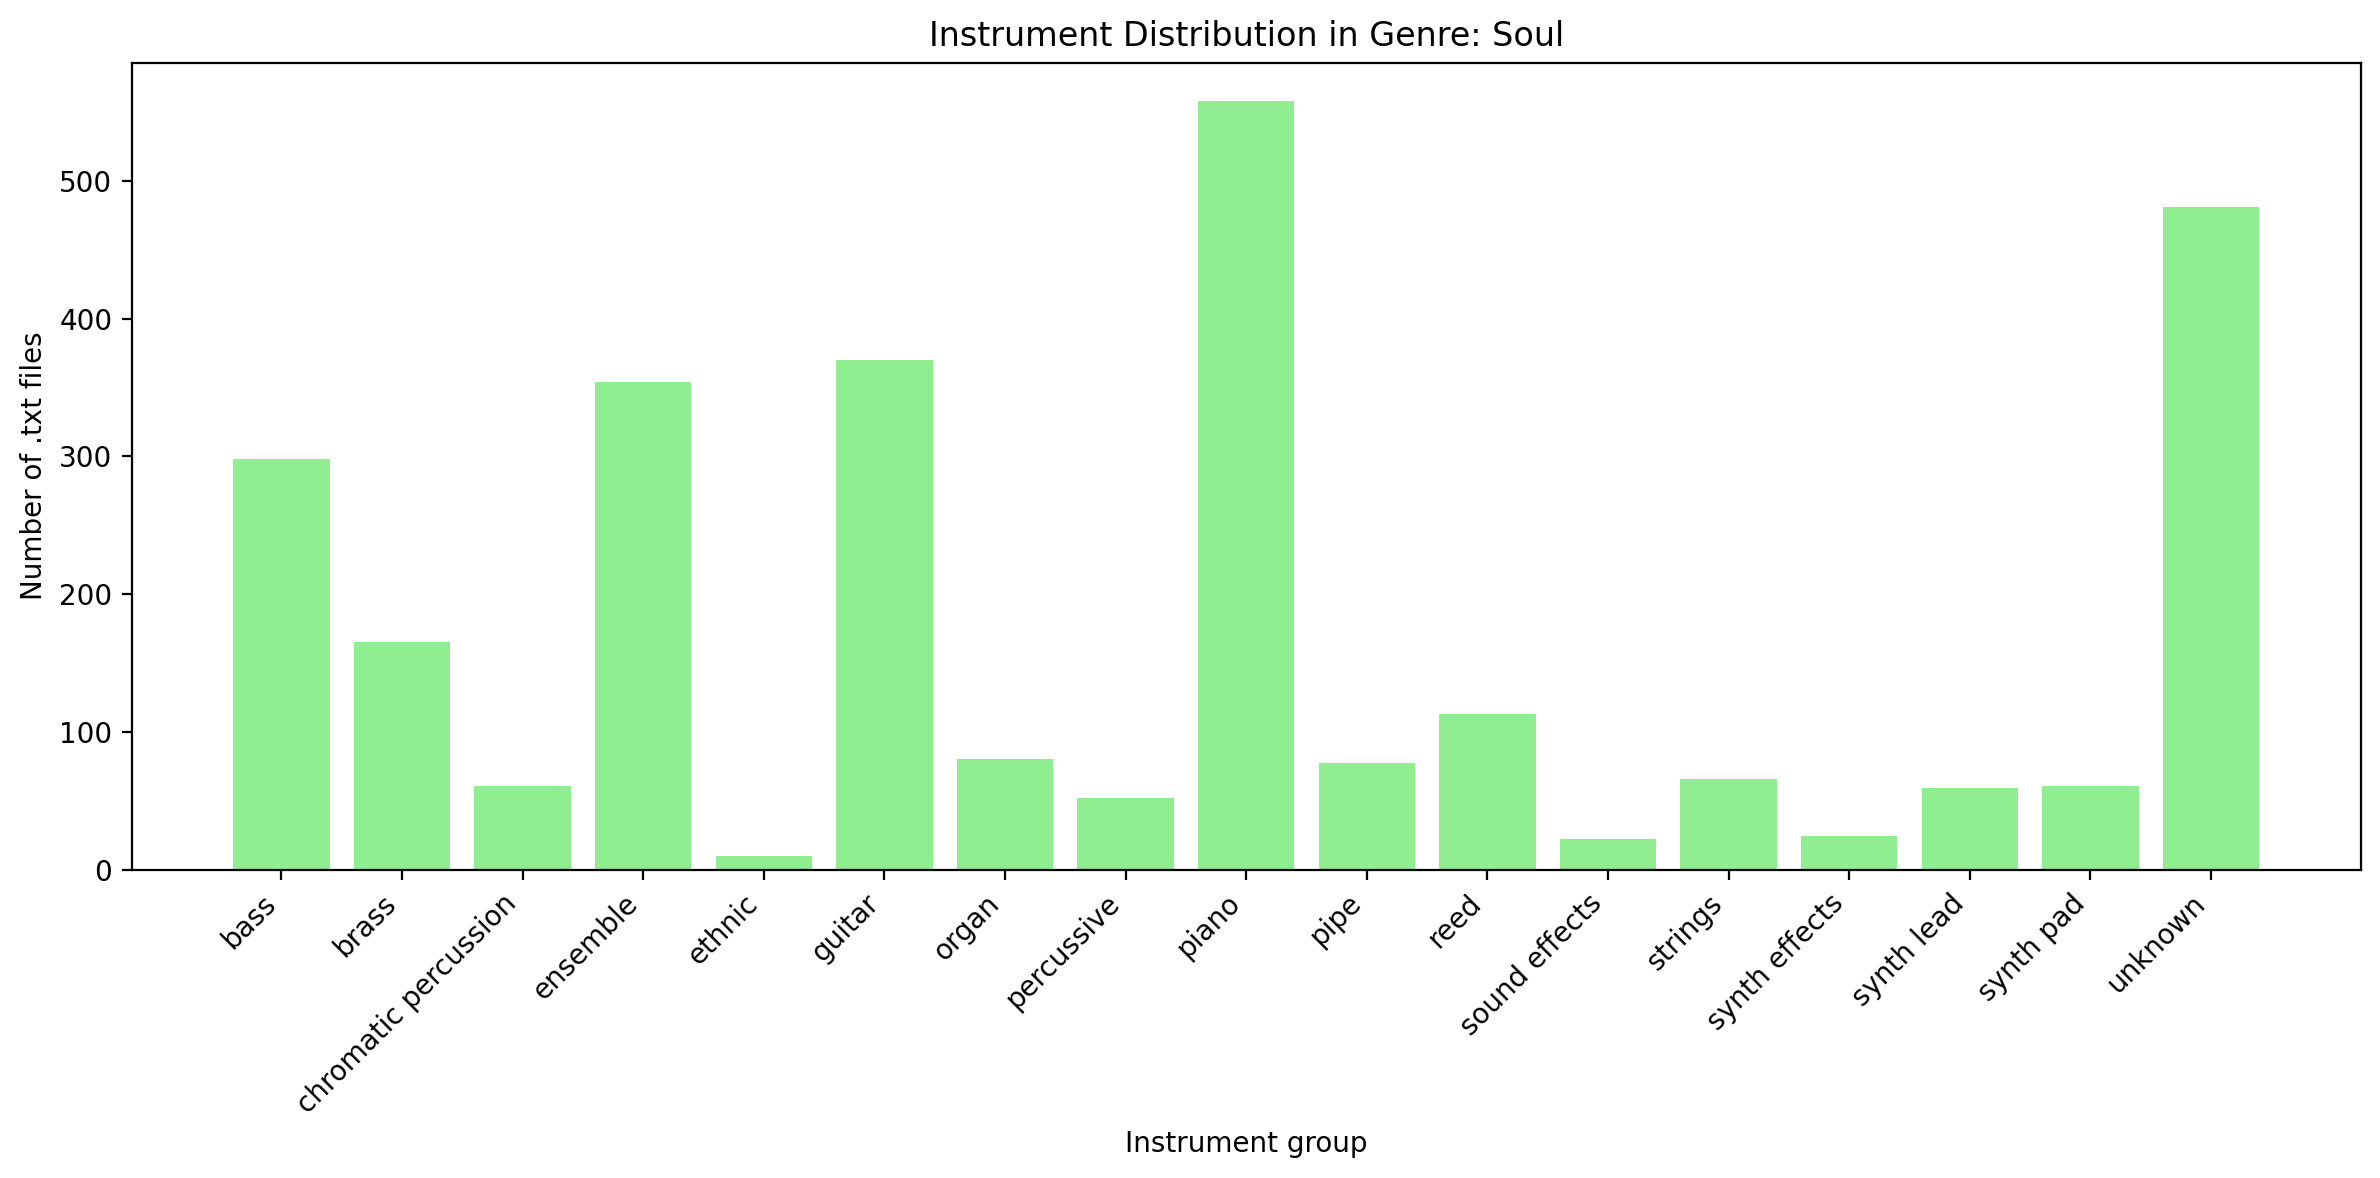

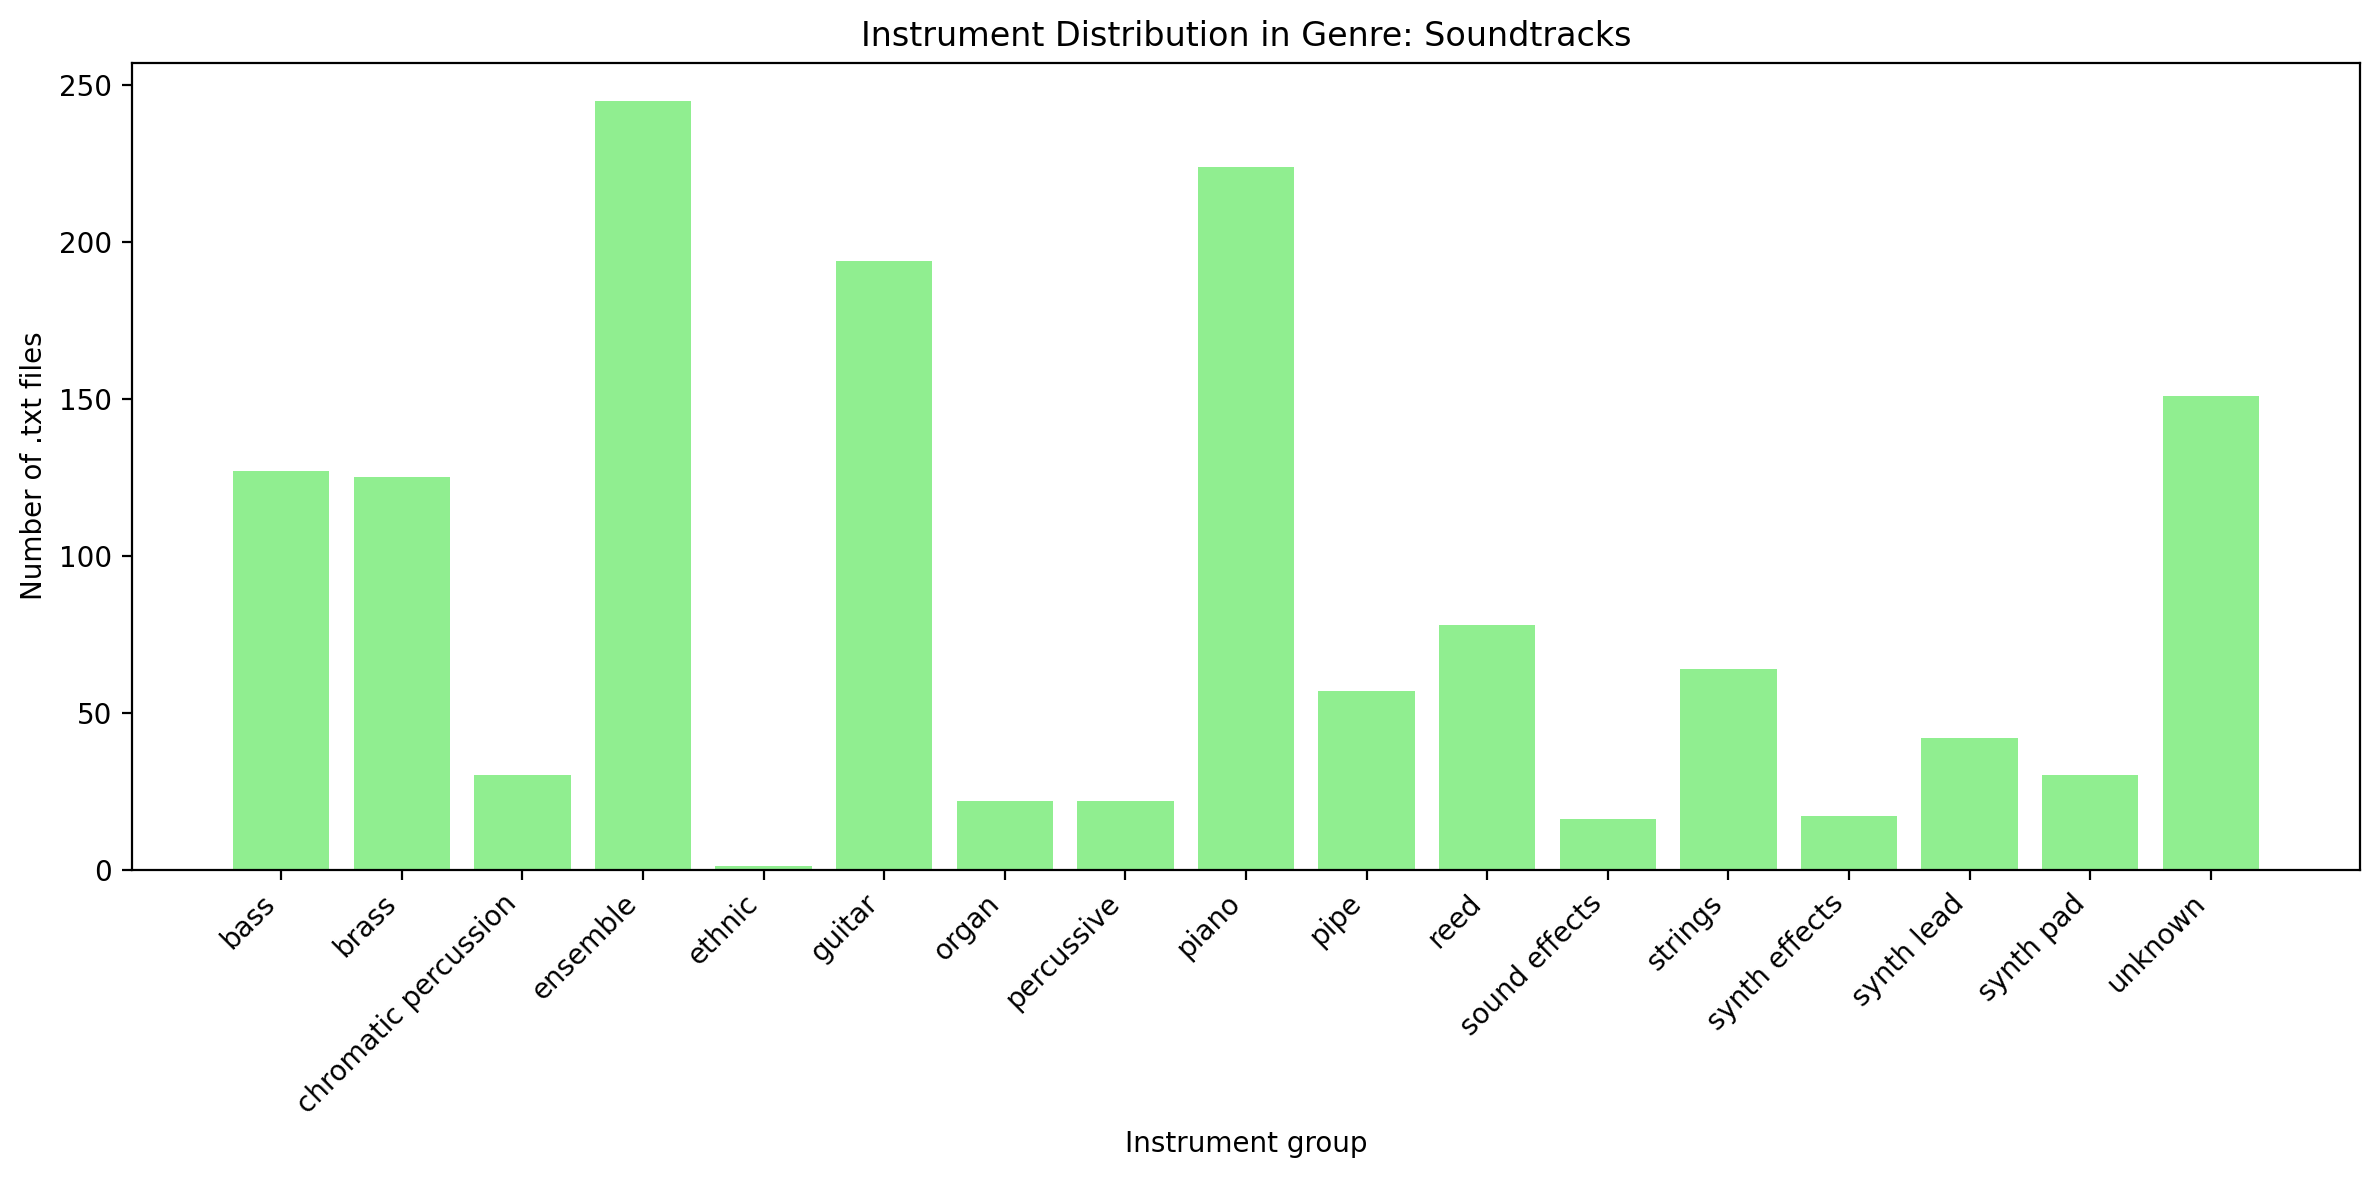

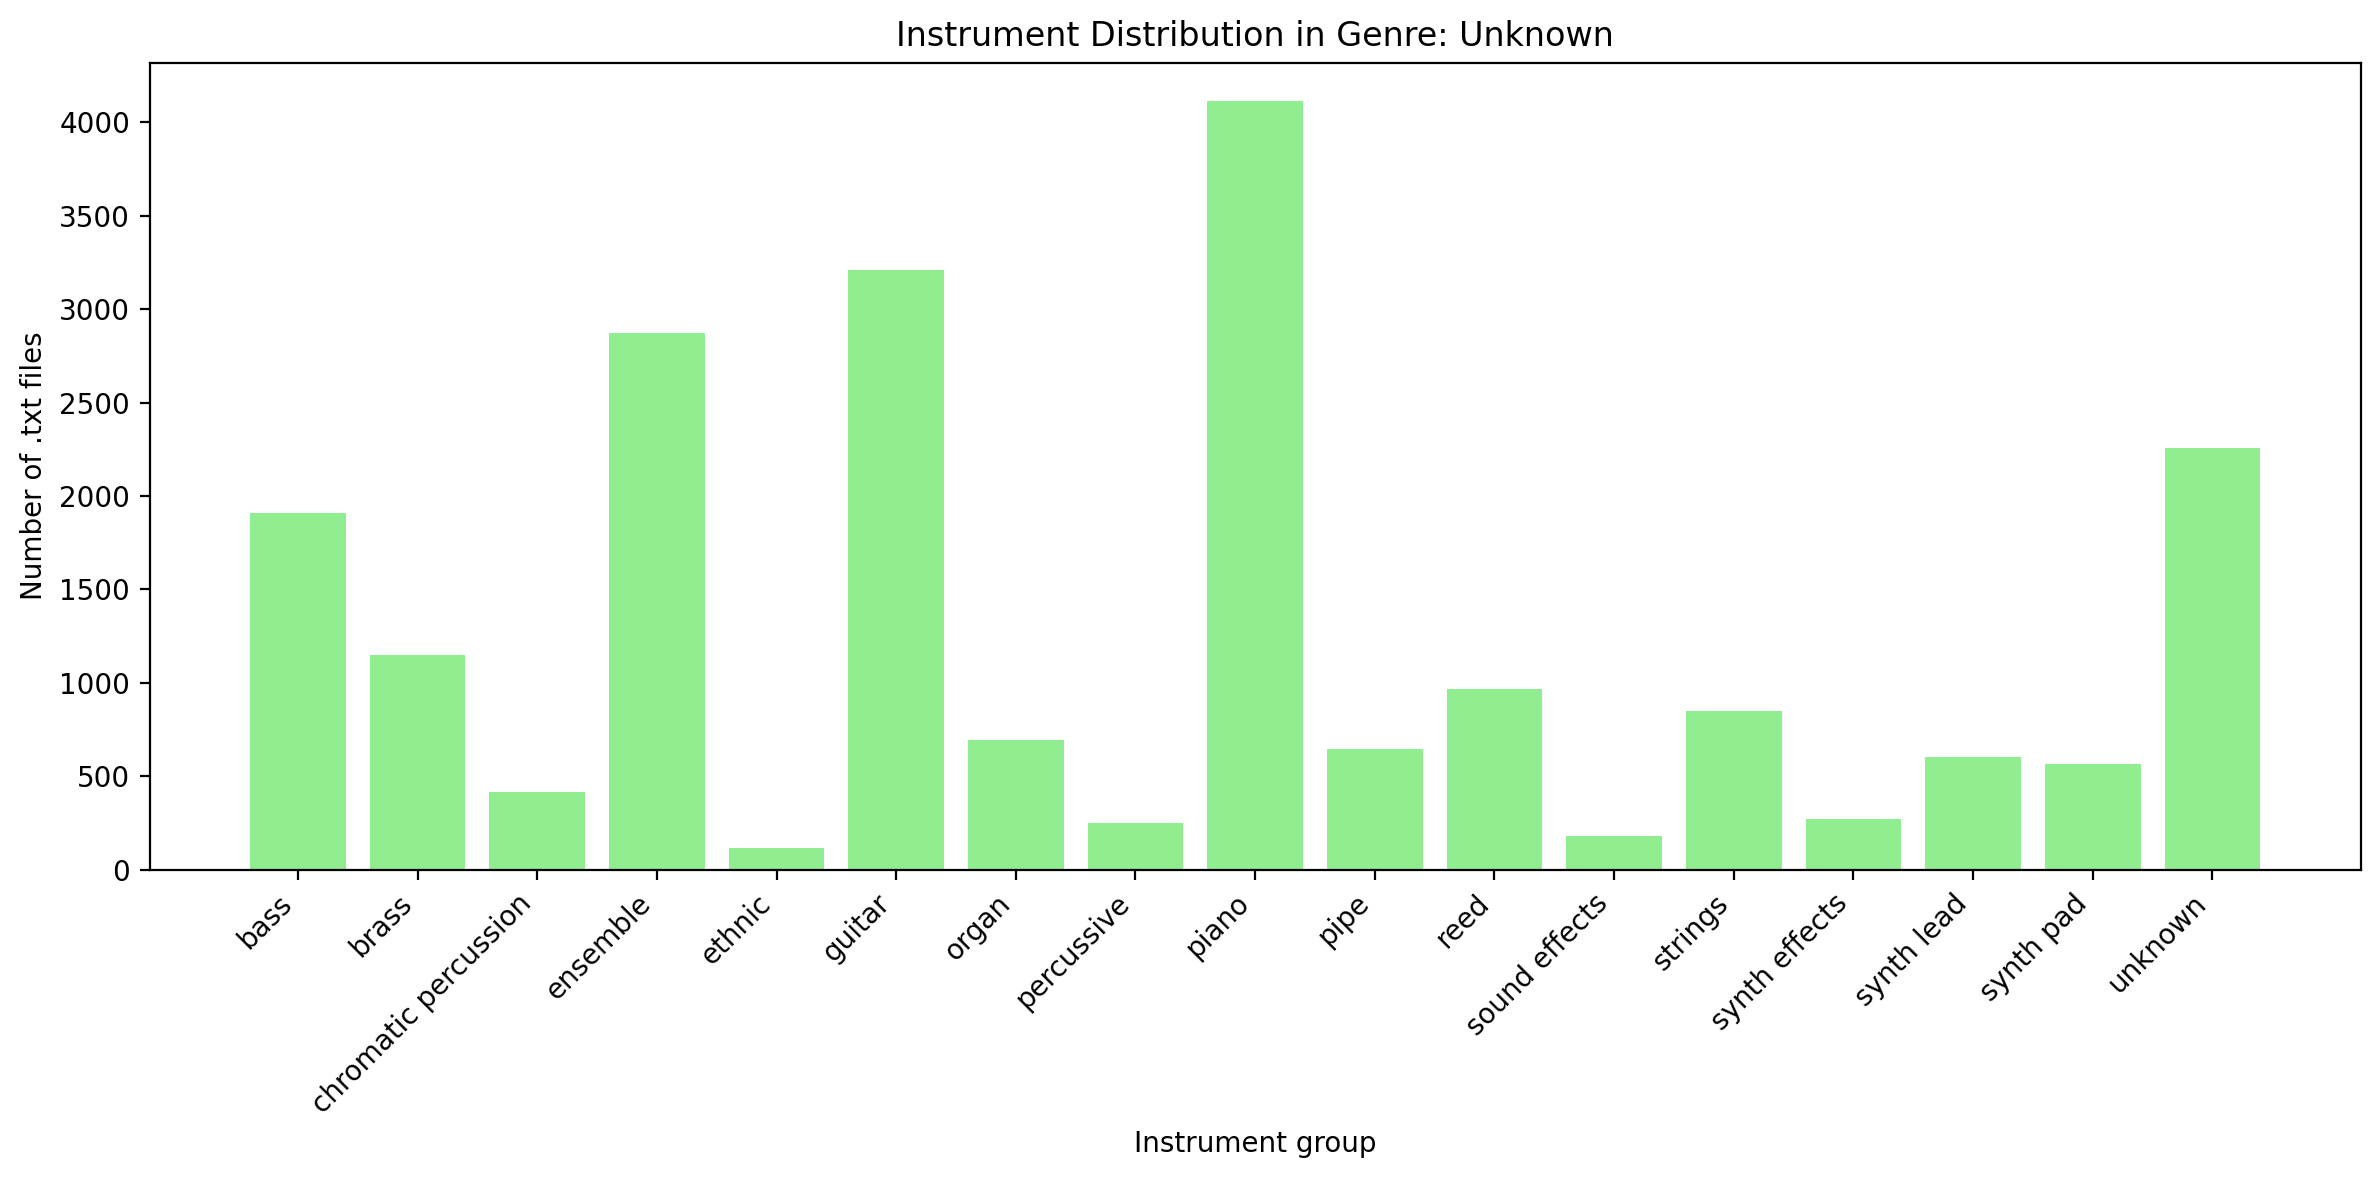

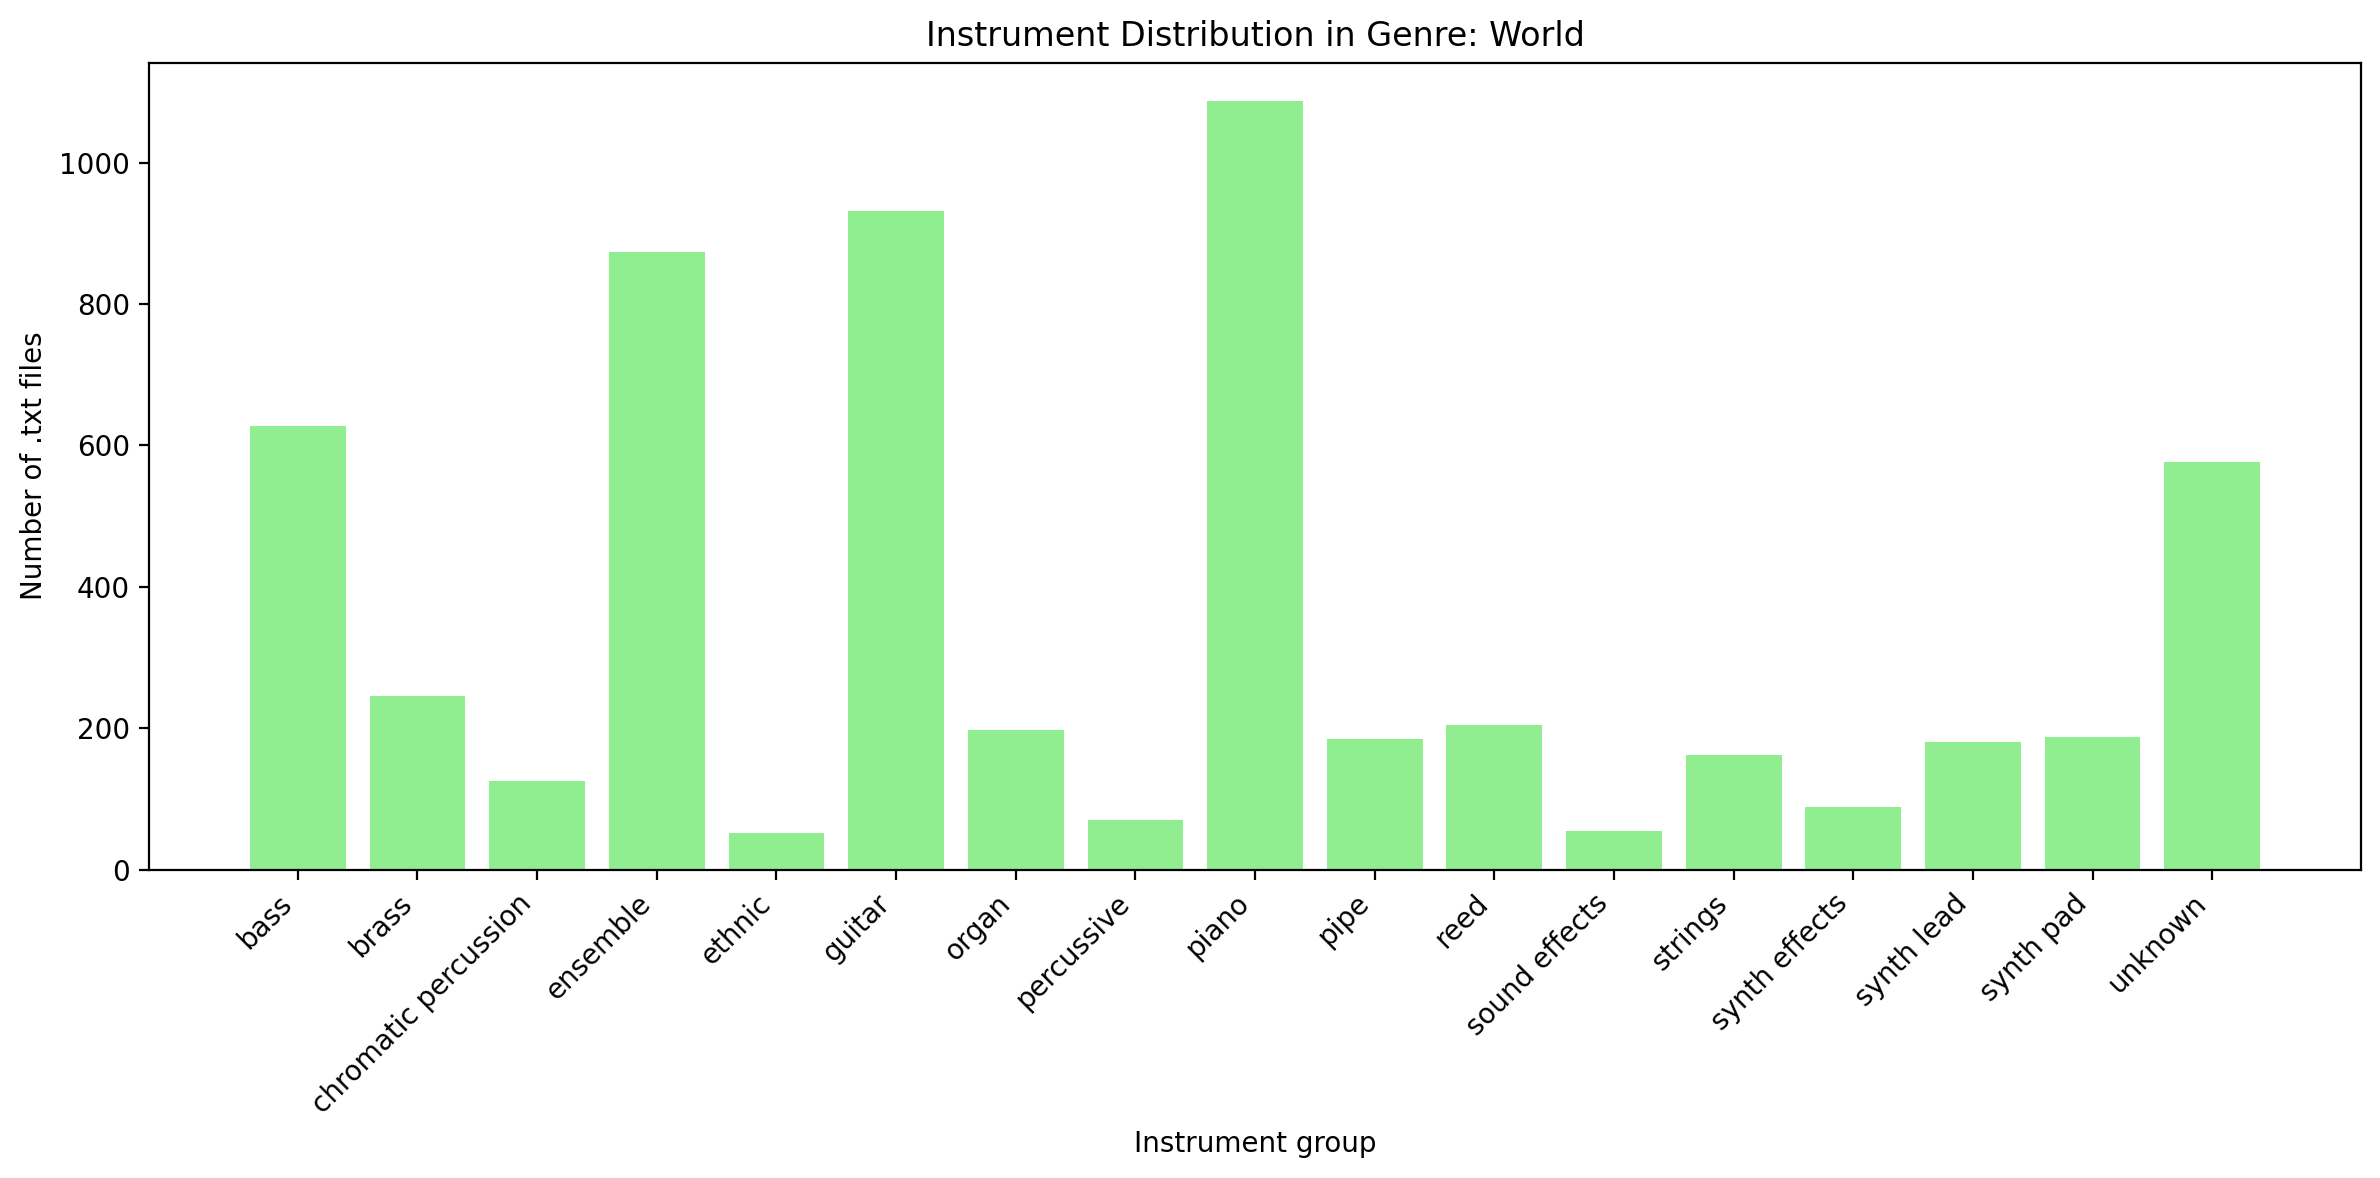

In [35]:
# Plot instrument distribution by genre
plot_genre_instrument_distribution(READY_MIDI_PATH)

In [36]:
genres_t = [d for d in glob.glob(f"{READY_MIDI_PATH}/*") if os.path.isdir(d)]
num_instr_by_genres = {}
for genre in genres_t:
    genre_name = os.path.basename(genre)
    num_instr_by_genres[genre_name] = count_instruments_by_txt_files(genre)
    # instrument_counts = count_instruments_by_txt_files(genre)
with open("num_instr_by_genres.json", "w") as f:
    json.dump(num_instr_by_genres, f)
print(num_instr_by_genres)

{'Ambient': {'bass': 195, 'brass': 122, 'chromatic percussion': 49, 'ensemble': 330, 'ethnic': 9, 'guitar': 246, 'organ': 68, 'percussive': 23, 'piano': 471, 'pipe': 91, 'reed': 105, 'sound effects': 20, 'strings': 131, 'synth effects': 22, 'synth lead': 33, 'synth pad': 58, 'unknown': 169}, 'Blues': {'bass': 103, 'brass': 59, 'chromatic percussion': 19, 'ensemble': 88, 'ethnic': 9, 'guitar': 153, 'organ': 42, 'percussive': 3, 'piano': 276, 'pipe': 20, 'reed': 57, 'sound effects': 3, 'strings': 14, 'synth effects': 4, 'synth lead': 14, 'synth pad': 7, 'unknown': 99}, 'Children': {'bass': 36, 'brass': 14, 'chromatic percussion': 4, 'ensemble': 56, 'ethnic': 2, 'guitar': 69, 'organ': 18, 'percussive': 3, 'piano': 77, 'pipe': 10, 'reed': 12, 'sound effects': 3, 'strings': 22, 'synth effects': 2, 'synth lead': 11, 'synth pad': 12, 'unknown': 27}, 'Classical': {'bass': 177, 'brass': 387, 'chromatic percussion': 80, 'ensemble': 933, 'ethnic': 14, 'guitar': 317, 'organ': 87, 'percussive': 33,

In [37]:
print(instrument_counts)

{'bass': 10530, 'brass': 4786, 'chromatic percussion': 2243, 'ensemble': 13288, 'ethnic': 621, 'guitar': 18423, 'organ': 3673, 'percussive': 1239, 'piano': 21222, 'pipe': 2875, 'reed': 4094, 'sound effects': 991, 'strings': 3523, 'synth effects': 1206, 'synth lead': 2916, 'synth pad': 2727, 'unknown': 11574}


In [38]:
import music21

# dick = Counter()
# for num in range(1,9):
#     for txt_file in glob.glob(f"{READY_MIDI_PATH}/**/*_{num}_.txt", recursive=True):
#             base_name = os.path.basename(txt_file)
#             parts = base_name.split("_")
#             if len(parts) > 3:  # Ensure instrument_id exists
#                 try:
#                     instrument_id = int(parts[2])  # Extract instrument_id (assumed numeric)
#                 except ValueError:
#                     instrument_id = -1  # Assign -1 for 'None' or invalid instrument_ids
#                 instrument_counts[instrument_id] += 1
#                 inst_name[parts[1]] += 1
#         print(inst_name)
for num in range(128):
    ins = ""
    try:
        ins = str(music21.instrument.instrumentFromMidiProgram(num))
    except:
        print("Not found num")
    print(f"{num} --> {ins}")

0 --> Piano
1 --> Piano
2 --> Electric Piano
3 --> Piano
4 --> Electric Piano
5 --> Electric Piano
6 --> Harpsichord
7 --> Clavichord
8 --> Celesta
9 --> Glockenspiel
10 --> Glockenspiel
11 --> Vibraphone
12 --> Marimba
13 --> Xylophone
14 --> Tubular Bells
15 --> Dulcimer
16 --> Electric Organ
17 --> Electric Organ
18 --> Electric Organ
19 --> Pipe Organ
20 --> Reed Organ
21 --> Accordion
22 --> Harmonica
23 --> Accordion
24 --> Acoustic Guitar
25 --> Acoustic Guitar
26 --> Electric Guitar
27 --> Electric Guitar
28 --> Electric Guitar
29 --> Electric Guitar
30 --> Electric Guitar
31 --> Electric Guitar
32 --> Acoustic Bass
33 --> Electric Bass
34 --> Electric Bass
35 --> Fretless Bass
36 --> Electric Bass
37 --> Electric Bass
38 --> Electric Bass
39 --> Electric Bass
40 --> Violin
41 --> Viola
42 --> Violoncello
43 --> Contrabass
44 --> StringInstrument
45 --> StringInstrument
46 --> Harp
47 --> Timpani
48 --> StringInstrument
49 --> StringInstrument
50 --> StringInstrument
51 --> Str